In [1]:
import rdkit

import pandas as pd
import numpy as np
from copy import deepcopy

from torch_geometric.datasets import MoleculeNet
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import AllChem

In [2]:
import custom_classification_functions
import custom_models
from custom_classification_functions import *
from custom_models import *
import custom_general_functions
from custom_general_functions import *

from copy import deepcopy

In [3]:
from custom_models_fingerprints import *

In [4]:
use_fingerprints = False

apply_scaffold_split = True

create_new_data = False

In [5]:
from torch_geometric.nn import global_mean_pool, global_max_pool

model_type = "GNN"


if not apply_scaffold_split:
    if not use_fingerprints:
        filename_basic = "results_classification_random_gnn/model_gnn_conv"
    else:
        filename_basic = "results_classification_random_fp/model_gnn_conv"
else:
    if not use_fingerprints:
        filename_basic = "results_classification_scaffold_gnn/model_gnn_conv"
    else:
        filename_basic = "results_classification_scaffold_fp/model_gnn_conv"

hidden_channels=[64]
gcn_layers=4
linear_sizes=[[512], [512, 256]]
aggregations=[global_mean_pool, global_max_pool]
apply_random_aggregations=False

learning_rate=0.001
batch_size = 1024

In [6]:
param_combinations = dict()

hidden_channels_list = [[64], [256], [512]]
linear_sizes_list = [[], [512]]
gcn_layers_list = [1, 2, 3, 4]
aggregations_list = [[global_mean_pool, global_max_pool], [global_mean_pool], [global_max_pool]]
apply_scaffold_split_list = [apply_scaffold_split]

In [7]:
param_combinations["hidden_channels_list"] = hidden_channels_list
param_combinations["linear_sizes_list"] = linear_sizes_list

param_combinations["gcn_layers_list"] = gcn_layers_list
param_combinations["aggregations_list"] = aggregations_list
param_combinations["apply_scaffold_split_list"] = apply_scaffold_split_list

In [8]:
import itertools


keys = list(param_combinations.keys())
values = list(param_combinations.values())

combinations = list(itertools.product(*values))

In [9]:


if use_fingerprints:
    param_combinations_fp = dict()

    param_combinations_fp["radius"] = [2, 3]
    param_combinations_fp["fpSize"] = [1024, 2048]
    param_combinations_fp["linear_layers"] = [[2048], [2048, 1024, 512], [1024, 512], [1024]]
    param_combinations_fp["create_count_fp"] = [True, False]
    param_combinations_fp["apply_scaffold_split_list"] = apply_scaffold_split_list

    keys_fp = list(param_combinations_fp.keys())
    values_fp = list(param_combinations_fp.values())

    combinations_fp = list(itertools.product(*values_fp))


In [10]:
if use_fingerprints:

    combinations = combinations_fp
    keys = keys_fp
    values = values_fp

In [11]:
print(len(combinations))

72


run: 0
{'hidden_channels_list': [64], 'linear_sizes_list': [], 'gcn_layers_list': 1, 'aggregations_list': [<function global_mean_pool at 0x00000167E3379B80>, <function global_max_pool at 0x00000167E337D550>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000167E60E4F10>, <dgl.data.utils.Subset object at 0x00000167899188B0>, <dgl.data.utils.Subset object at 0x0000016789918B20>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=128, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  769


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 0.3485935641960664 | Validation Loss 0.12671167626976967 | Validation accuracy 0.974609375
Epoch 10 | Train Loss 0.1606570358077685 | Validation Loss 0.23789156824350358 | Validation accuracy 0.9399011948529411
Epoch 20 | Train Loss 0.15842362583586664 | Validation Loss 0.11968767121434212 | Validation accuracy 0.974609375
Epoch 30 | Train Loss 0.15644828184987558 | Validation Loss 0.1569303959608078 | Validation accuracy 0.9630399816176471
Epoch 40 | Train Loss 0.1558077231501088 | Validation Loss 0.19380000084638596 | Validation accuracy 0.9514705882352942
Epoch 50 | Train Loss 0.1525447822429917 | Validation Loss 0.15858441293239595 | Validation accuracy 0.9630399816176471
Epoch 60 | Train Loss 0.15119780577493436 | Validation Loss 0.11683859750628471 | Validation accuracy 0.974609375
Epoch 70 | Train Loss 0.15188557157913843 | Validation Loss 0.15498117208480836 | Validation accuracy 0.9630399816176471
Epoch 80 | Train Loss 0.1492552018978379 | Validation Loss 

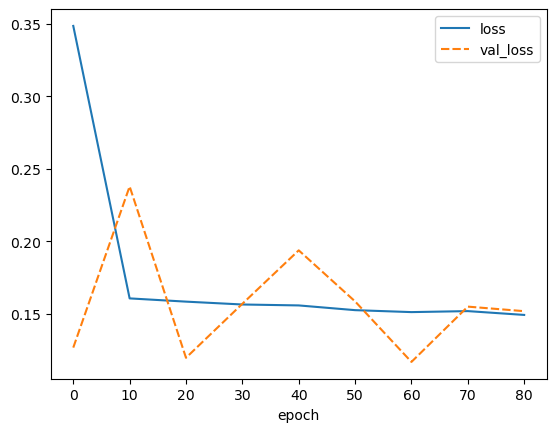

best weights loaded


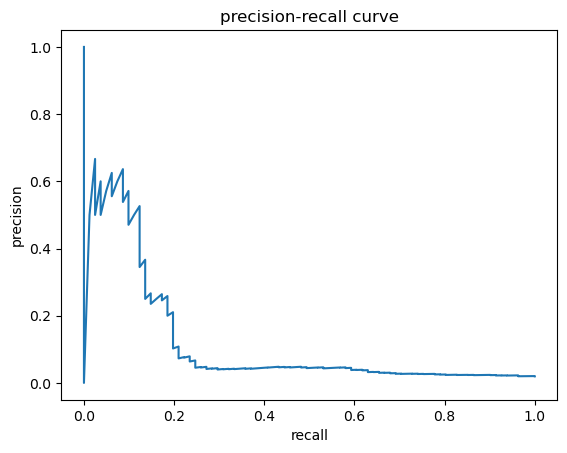

elapsed time: 362.754079580307
run: 1
{'hidden_channels_list': [64], 'linear_sizes_list': [], 'gcn_layers_list': 1, 'aggregations_list': [<function global_mean_pool at 0x00000167E3379B80>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000167E7F861C0>, <dgl.data.utils.Subset object at 0x000001688E215A60>, <dgl.data.utils.Subset object at 0x000001688E215EB0>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=64, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  705
Epoch 0 | Train Loss 0.4578640858332316 | Validation Loss 0.20029081404209137 | Validation accuracy 0.974609375
Epoch 10 | Train Loss 0.1629052275057995 | Validation Loss 0.1556733399629593 | Validation accuracy 0.9630399816176471
Epoch 20 | Train Loss 0.1578150667024381 | Validation Loss 0.11781179681420326 | Validation accuracy 0.974

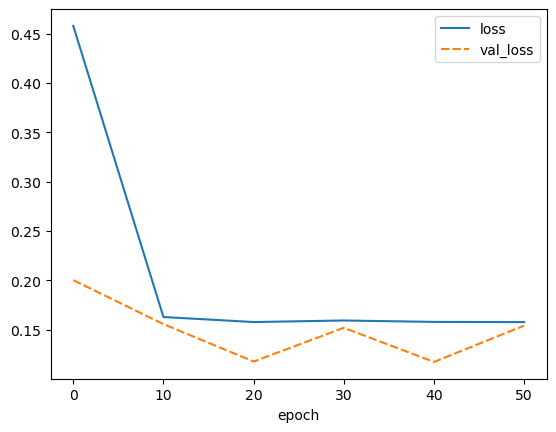

best weights loaded


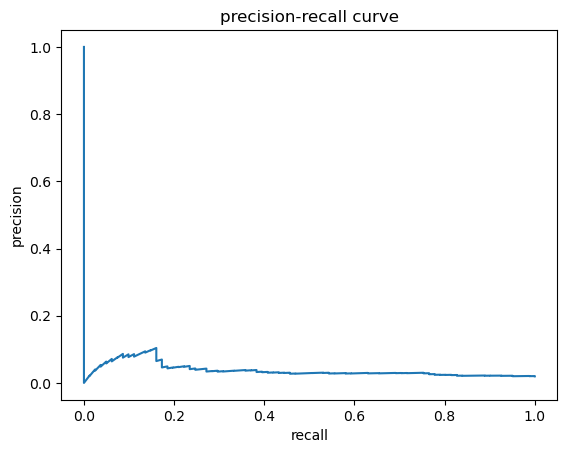

elapsed time: 228.8516709804535
run: 2
{'hidden_channels_list': [64], 'linear_sizes_list': [], 'gcn_layers_list': 1, 'aggregations_list': [<function global_max_pool at 0x00000167E337D550>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000167E60B4A00>, <dgl.data.utils.Subset object at 0x0000016789A06280>, <dgl.data.utils.Subset object at 0x0000016789A06880>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=64, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  705
Epoch 0 | Train Loss 0.3275208193244356 | Validation Loss 0.19568195044994355 | Validation accuracy 0.9514705882352942
Epoch 10 | Train Loss 0.1622783767454552 | Validation Loss 0.12142862230539322 | Validation accuracy 0.974609375
Epoch 20 | Train Loss 0.16057847801483038 | Validation Loss 0.12013492211699486 | Validation accuracy 0.9

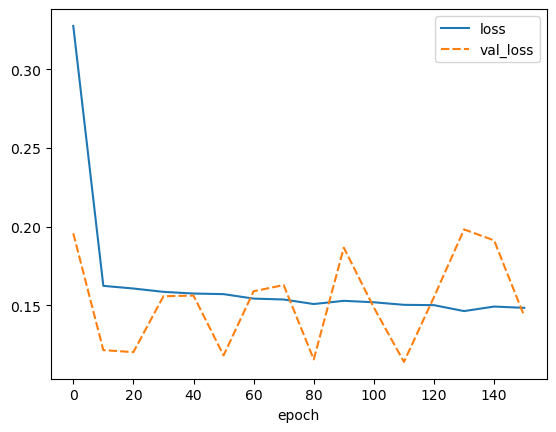

best weights loaded


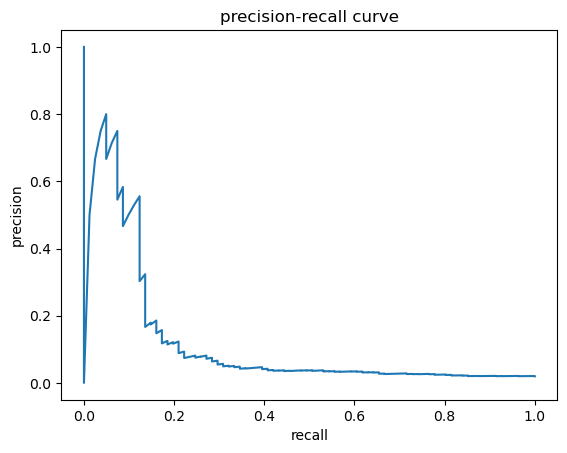

elapsed time: 620.9032599925995
run: 3
{'hidden_channels_list': [64], 'linear_sizes_list': [], 'gcn_layers_list': 2, 'aggregations_list': [<function global_mean_pool at 0x00000167E3379B80>, <function global_max_pool at 0x00000167E337D550>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000167E7EE06D0>, <dgl.data.utils.Subset object at 0x0000016789A0D730>, <dgl.data.utils.Subset object at 0x000001688E215CA0>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1): GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=128, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  4929
Epoch 0 | Train Loss 0.26100836220112716 | Validation Loss 0.17307527661323546 | Validation accuracy 0.9630399816176471
Epoch 10 | Train Loss 0.15675877305594357 | Validation Loss 0.11642088666558266 | Validation accuracy 0.974609375
Epoch 20 | Train Loss 0.1

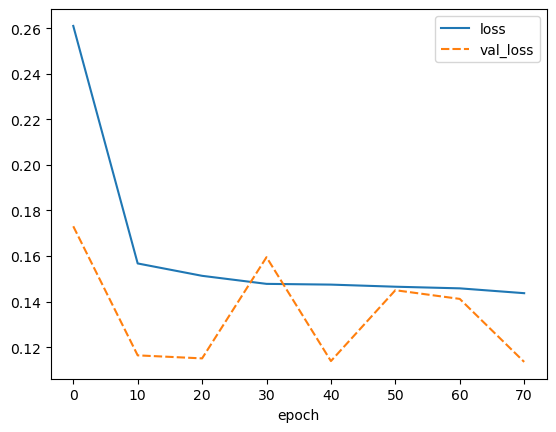

best weights loaded


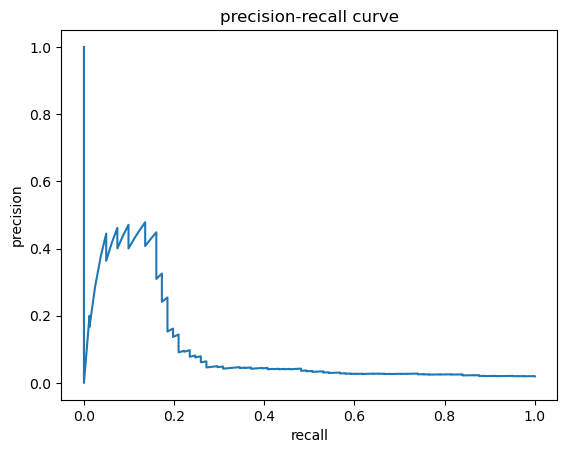

elapsed time: 280.47553539276123
run: 4
{'hidden_channels_list': [64], 'linear_sizes_list': [], 'gcn_layers_list': 2, 'aggregations_list': [<function global_mean_pool at 0x00000167E3379B80>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000167E81BF640>, <dgl.data.utils.Subset object at 0x00000167E7FF0760>, <dgl.data.utils.Subset object at 0x0000016789A0DF40>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1): GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=64, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  4865
Epoch 0 | Train Loss 0.32885482049349585 | Validation Loss 0.15942703932523727 | Validation accuracy 0.9630399816176471
Epoch 10 | Train Loss 0.15820058796441916 | Validation Loss 0.11885195225477219 | Validation accuracy 0.974609375
Epoch 20 | Train Loss 0.15829657063339697 | Validation Loss 0.1939804166555

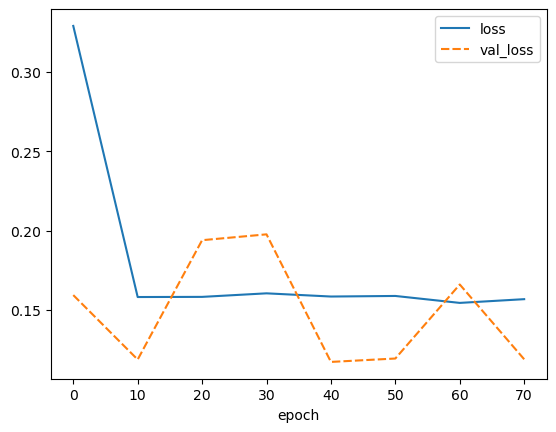

best weights loaded


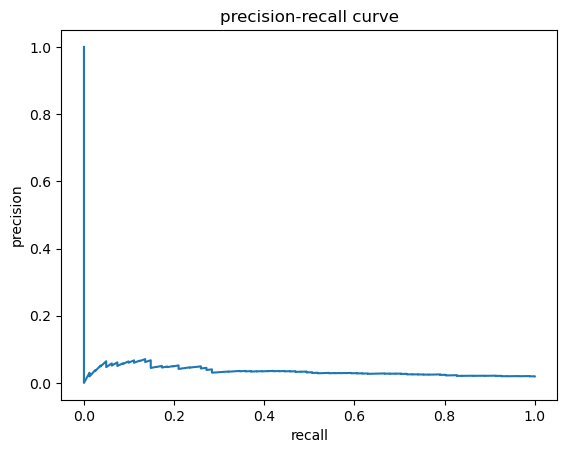

elapsed time: 291.34122109413147
run: 5
{'hidden_channels_list': [64], 'linear_sizes_list': [], 'gcn_layers_list': 2, 'aggregations_list': [<function global_max_pool at 0x00000167E337D550>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000167E82A8B50>, <dgl.data.utils.Subset object at 0x0000016789B32D00>, <dgl.data.utils.Subset object at 0x0000016789B32700>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1): GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=64, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  4865
Epoch 0 | Train Loss 0.20452599227428436 | Validation Loss 0.13204204365611077 | Validation accuracy 0.974609375
Epoch 10 | Train Loss 0.1566344483783751 | Validation Loss 0.1485006183385849 | Validation accuracy 0.9630399816176471
Epoch 20 | Train Loss 0.1522270678119226 | Validation Loss 0.12091294676065445

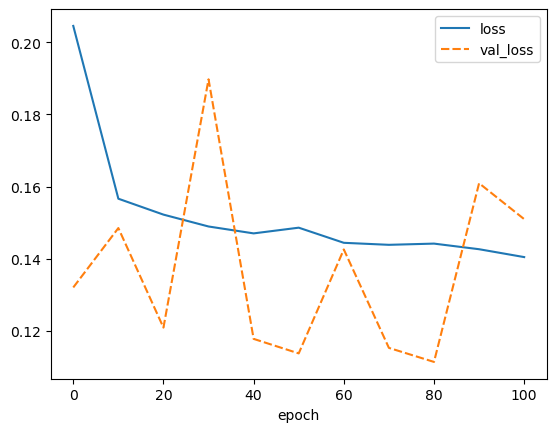

best weights loaded


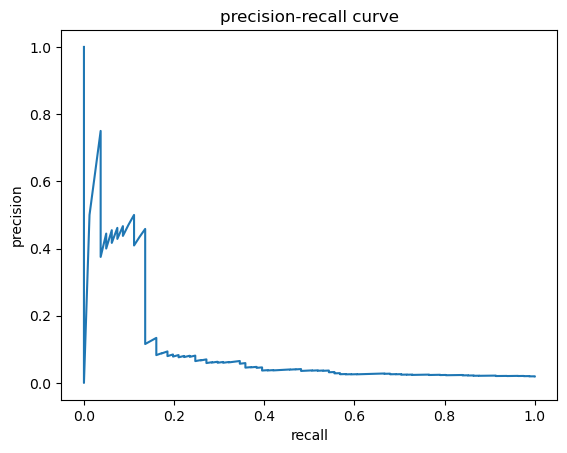

elapsed time: 418.6105272769928
run: 6
{'hidden_channels_list': [64], 'linear_sizes_list': [], 'gcn_layers_list': 3, 'aggregations_list': [<function global_mean_pool at 0x00000167E3379B80>, <function global_max_pool at 0x00000167E337D550>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000167E83ACD00>, <dgl.data.utils.Subset object at 0x0000016789B32B20>, <dgl.data.utils.Subset object at 0x0000016789B329A0>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1-2): 2 x GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=128, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  9089
Epoch 0 | Train Loss 0.23093525297714002 | Validation Loss 0.12284472920000553 | Validation accuracy 0.974609375
Epoch 10 | Train Loss 0.15992132235657086 | Validation Loss 0.11668284460902215 | Validation accuracy 0.974609375
Epoch 20 | Train Loss 0.15

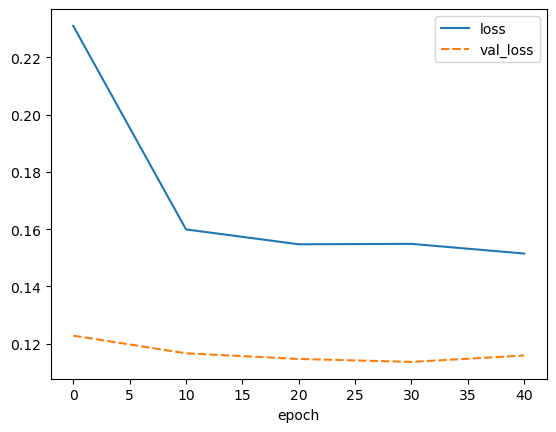

best weights loaded


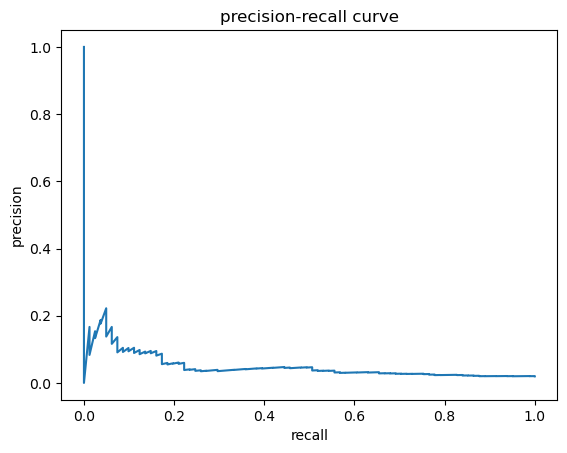

elapsed time: 226.99561309814453
run: 7
{'hidden_channels_list': [64], 'linear_sizes_list': [], 'gcn_layers_list': 3, 'aggregations_list': [<function global_mean_pool at 0x00000167E3379B80>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000167E85EAEB0>, <dgl.data.utils.Subset object at 0x0000016789B32CD0>, <dgl.data.utils.Subset object at 0x0000016789B32F10>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1-2): 2 x GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=64, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  9025
Epoch 0 | Train Loss 0.4575338201089339 | Validation Loss 0.12238277420401573 | Validation accuracy 0.974609375
Epoch 10 | Train Loss 0.1571732931064837 | Validation Loss 0.1543786734342575 | Validation accuracy 0.9630399816176471
Epoch 20 | Train Loss 0.15909260217890595 | Validation Loss 0.1197173081

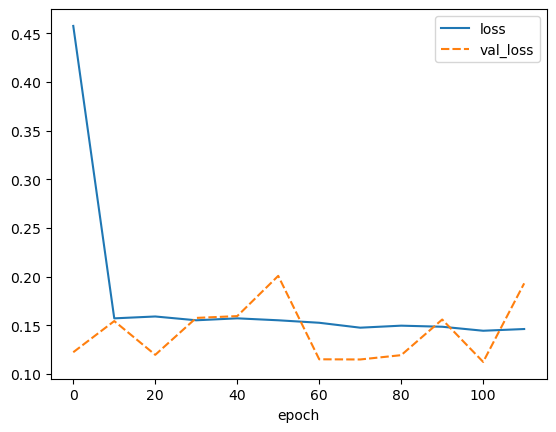

best weights loaded


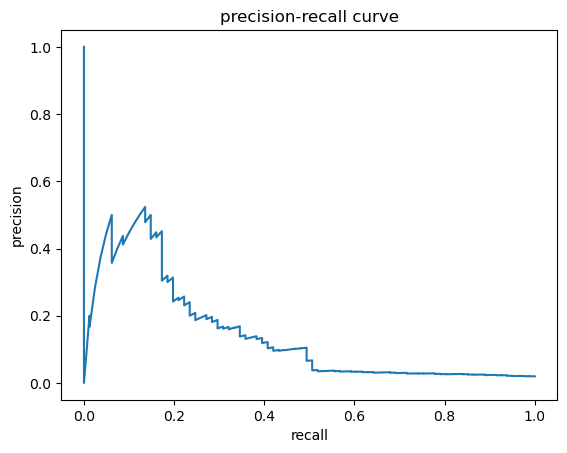

elapsed time: 499.8144500255585
run: 8
{'hidden_channels_list': [64], 'linear_sizes_list': [], 'gcn_layers_list': 3, 'aggregations_list': [<function global_max_pool at 0x00000167E337D550>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000167E83E5FD0>, <dgl.data.utils.Subset object at 0x00000167899F8370>, <dgl.data.utils.Subset object at 0x00000167899F8430>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1-2): 2 x GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=64, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  9025
Epoch 0 | Train Loss 0.24390046298503876 | Validation Loss 0.16851245164871215 | Validation accuracy 0.9630399816176471
Epoch 10 | Train Loss 0.15710259251522296 | Validation Loss 0.11710820123553276 | Validation accuracy 0.974609375
Epoch 20 | Train Loss 0.1566935922160293 | Validation Loss 0.1176105938

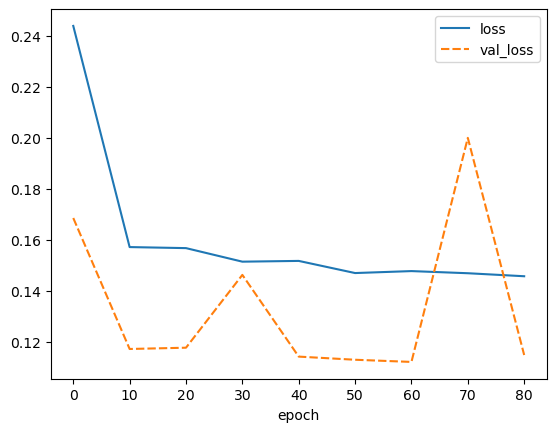

best weights loaded


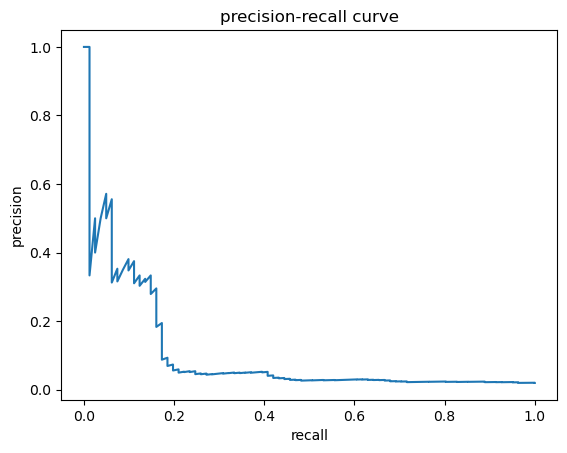

elapsed time: 365.23903799057007
run: 9
{'hidden_channels_list': [64], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x00000167E3379B80>, <function global_max_pool at 0x00000167E337D550>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000167E978D850>, <dgl.data.utils.Subset object at 0x0000016789B3DF70>, <dgl.data.utils.Subset object at 0x0000016789B3D370>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1-3): 3 x GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=128, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  13249
Epoch 0 | Train Loss 0.24882065482211835 | Validation Loss 0.12238043360412121 | Validation accuracy 0.974609375
Epoch 10 | Train Loss 0.15556108341975647 | Validation Loss 0.14838939011096955 | Validation accuracy 0.9630399816176471
Epoch 20 | Train 

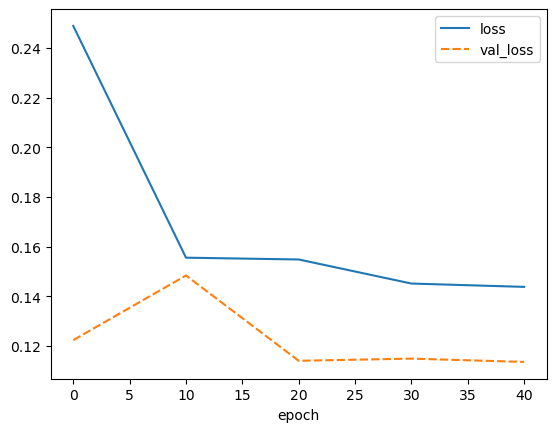

best weights loaded


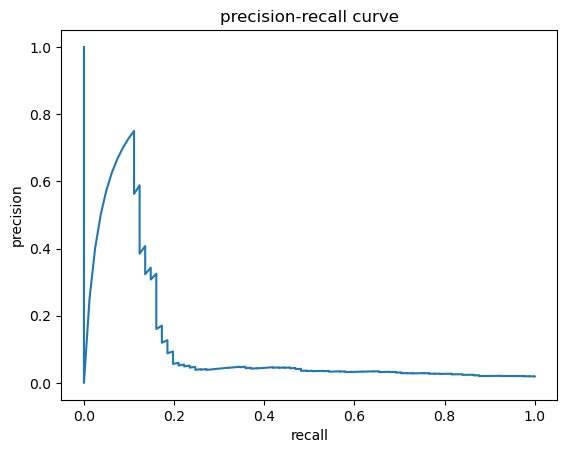

elapsed time: 210.75150275230408
run: 10
{'hidden_channels_list': [64], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x00000167E3379B80>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000167E86E6E50>, <dgl.data.utils.Subset object at 0x000001678793D370>, <dgl.data.utils.Subset object at 0x000001678793DDC0>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1-3): 3 x GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=64, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  13185
Epoch 0 | Train Loss 0.20686112615195187 | Validation Loss 0.1928476572036743 | Validation accuracy 0.9514705882352942
Epoch 10 | Train Loss 0.16128982964790228 | Validation Loss 0.12075551226735115 | Validation accuracy 0.974609375
Epoch 20 | Train Loss 0.1558592448180372 | Validation Loss 0.1198502

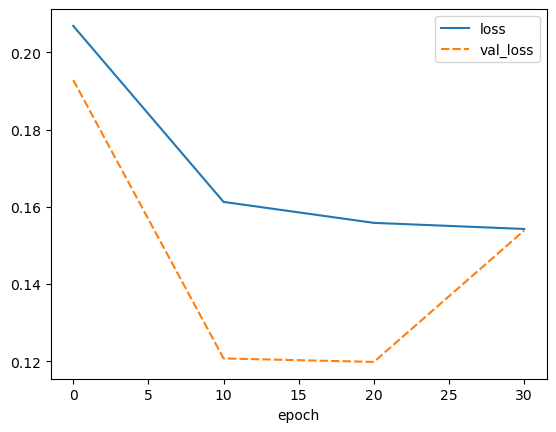

best weights loaded


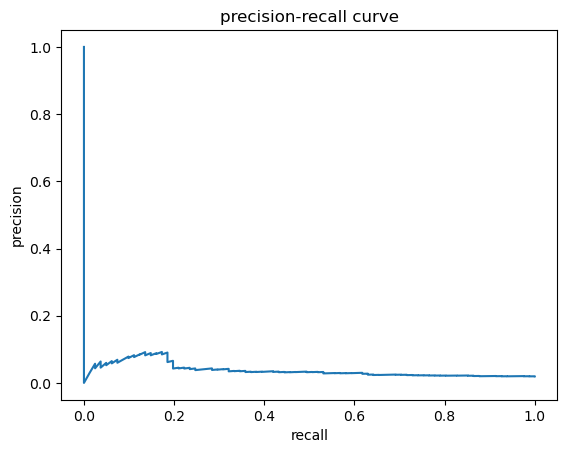

elapsed time: 156.47497272491455
run: 11
{'hidden_channels_list': [64], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x00000167E337D550>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000167E8760850>, <dgl.data.utils.Subset object at 0x00000167E9760E50>, <dgl.data.utils.Subset object at 0x00000167E9760550>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1-3): 3 x GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=64, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  13185
Epoch 0 | Train Loss 0.2715009866338788 | Validation Loss 0.12647824361920357 | Validation accuracy 0.974609375
Epoch 10 | Train Loss 0.15880797238964023 | Validation Loss 0.119800416380167 | Validation accuracy 0.974609375
Epoch 20 | Train Loss 0.1530552339373213 | Validation Loss 0.14591965973377227

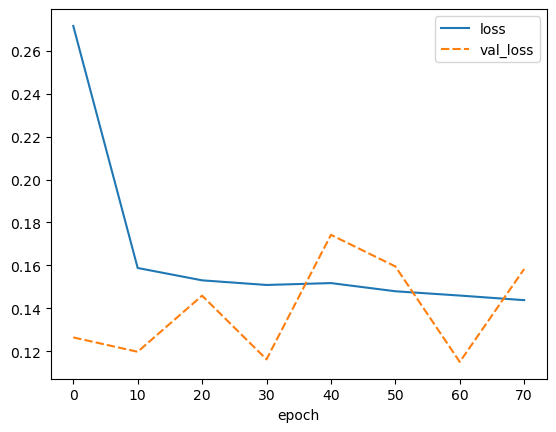

best weights loaded


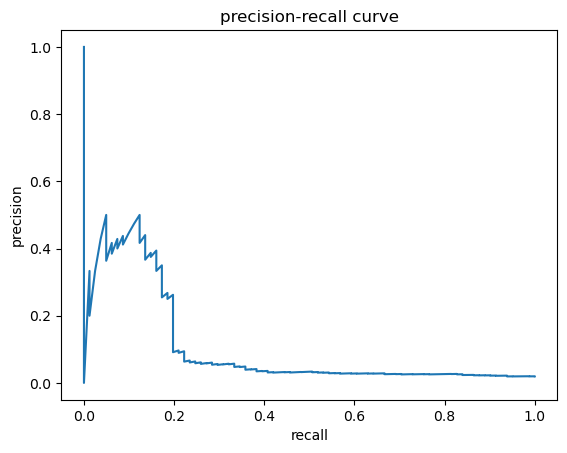

elapsed time: 331.408584356308
run: 12
{'hidden_channels_list': [64], 'linear_sizes_list': [512], 'gcn_layers_list': 1, 'aggregations_list': [<function global_mean_pool at 0x00000167E3379B80>, <function global_max_pool at 0x00000167E337D550>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000167E99DA880>, <dgl.data.utils.Subset object at 0x000001687733B670>, <dgl.data.utils.Subset object at 0x000001687733B9A0>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=128, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  769
Epoch 0 | Train Loss 0.2242187586697665 | Validation Loss 0.2073800802230835 | Validation accuracy 0.9514705882352942
Epoch 10 | Train Loss 0.15989711700063763 | Validation Loss 0.1186209537088871 | Validation accuracy 0.974609375
Epoch 20 | Train Loss 0.15644179194262534 | Validat

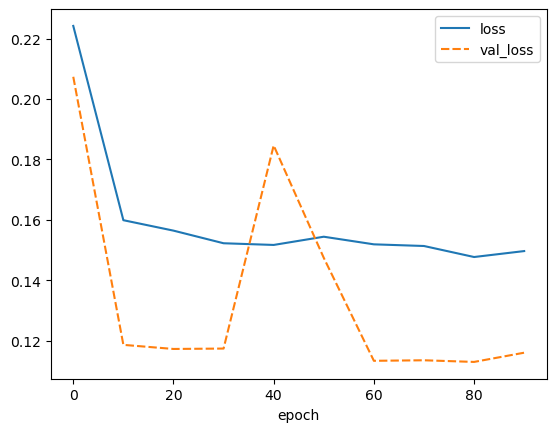

best weights loaded


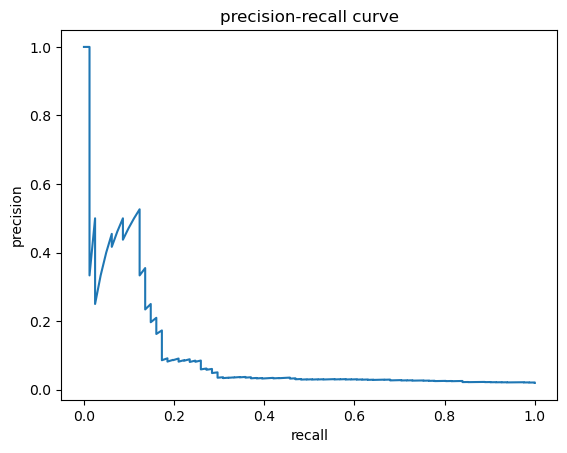

elapsed time: 345.17343831062317
run: 13
{'hidden_channels_list': [64], 'linear_sizes_list': [512], 'gcn_layers_list': 1, 'aggregations_list': [<function global_mean_pool at 0x00000167E3379B80>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000167E9A9CAC0>, <dgl.data.utils.Subset object at 0x00000167E9A8CC10>, <dgl.data.utils.Subset object at 0x000001687734C040>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=64, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  705
Epoch 0 | Train Loss 0.3876906561129021 | Validation Loss 0.16343315243721007 | Validation accuracy 0.974609375
Epoch 10 | Train Loss 0.159701484170827 | Validation Loss 0.15758474469184874 | Validation accuracy 0.9630399816176471
Epoch 20 | Train Loss 0.15827014184359348 | Validation Loss 0.15550300776958464 | Validation accurac

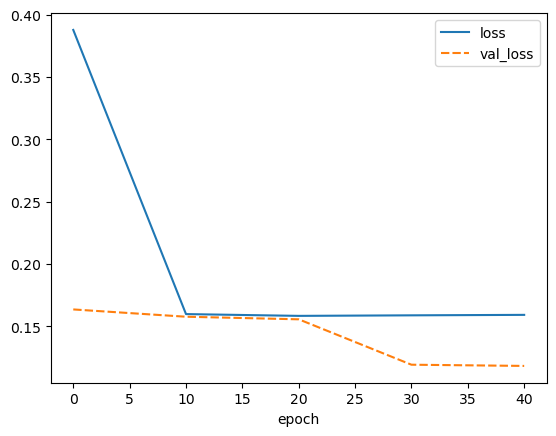

best weights loaded


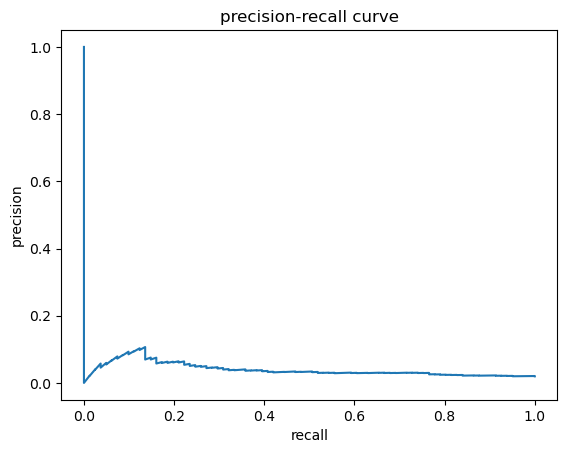

elapsed time: 171.5779116153717
run: 14
{'hidden_channels_list': [64], 'linear_sizes_list': [512], 'gcn_layers_list': 1, 'aggregations_list': [<function global_max_pool at 0x00000167E337D550>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000167E99C6520>, <dgl.data.utils.Subset object at 0x000001687734C640>, <dgl.data.utils.Subset object at 0x000001687734C370>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=64, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  705
Epoch 0 | Train Loss 0.4170337757377913 | Validation Loss 0.1487750828266144 | Validation accuracy 0.974609375
Epoch 10 | Train Loss 0.15870032956202826 | Validation Loss 0.16221849620342255 | Validation accuracy 0.9630399816176471
Epoch 20 | Train Loss 0.15853531071634003 | Validation Loss 0.1610570102930069 | Validation accuracy 

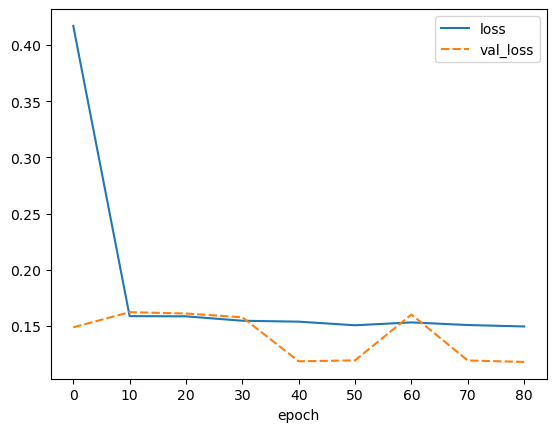

best weights loaded


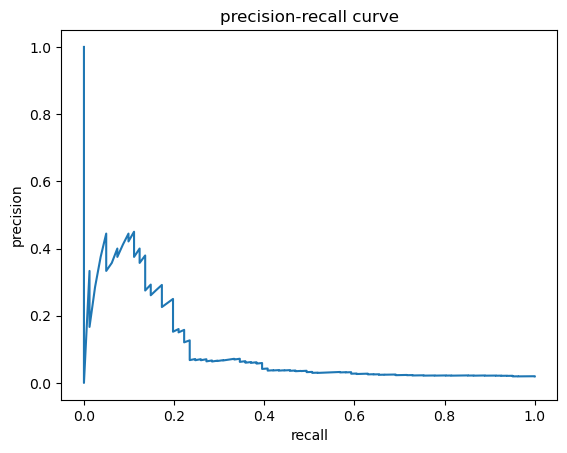

elapsed time: 309.4844946861267
run: 15
{'hidden_channels_list': [64], 'linear_sizes_list': [512], 'gcn_layers_list': 2, 'aggregations_list': [<function global_mean_pool at 0x00000167E3379B80>, <function global_max_pool at 0x00000167E337D550>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000167E9BD7220>, <dgl.data.utils.Subset object at 0x000001688E322520>, <dgl.data.utils.Subset object at 0x000001688E322790>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1): GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=128, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  4929
Epoch 0 | Train Loss 0.2803266215505022 | Validation Loss 0.12372197136282921 | Validation accuracy 0.974609375
Epoch 10 | Train Loss 0.15557370967034137 | Validation Loss 0.1506921023130417 | Validation accuracy 0.9630399816176471
Epoch 20 | Train Loss 0

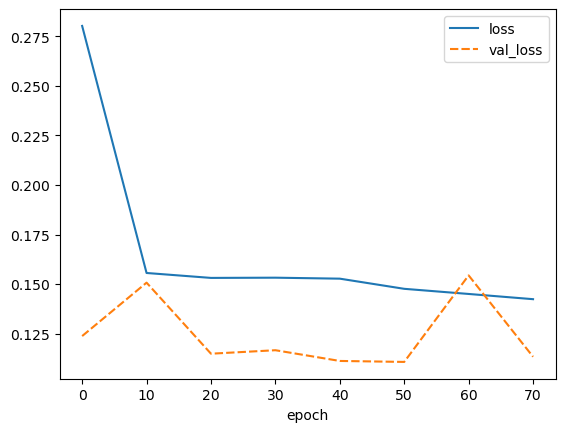

best weights loaded


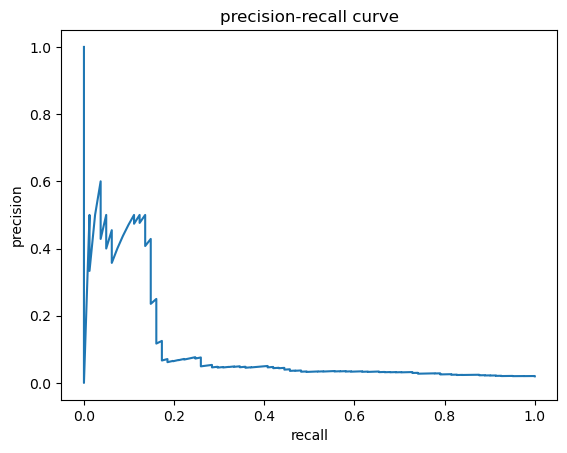

elapsed time: 275.20258498191833
run: 16
{'hidden_channels_list': [64], 'linear_sizes_list': [512], 'gcn_layers_list': 2, 'aggregations_list': [<function global_mean_pool at 0x00000167E3379B80>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000167E9E6FF40>, <dgl.data.utils.Subset object at 0x000001678793D820>, <dgl.data.utils.Subset object at 0x000001678793D3D0>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1): GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=64, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  4865
Epoch 0 | Train Loss 0.2715992999799324 | Validation Loss 0.11895109005272389 | Validation accuracy 0.974609375
Epoch 10 | Train Loss 0.16141063426480148 | Validation Loss 0.11929533034563064 | Validation accuracy 0.974609375
Epoch 20 | Train Loss 0.16087719933553177 | Validation Loss 0.1960006147623062 

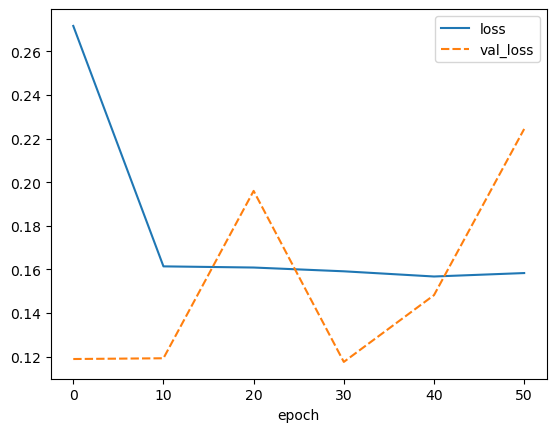

best weights loaded


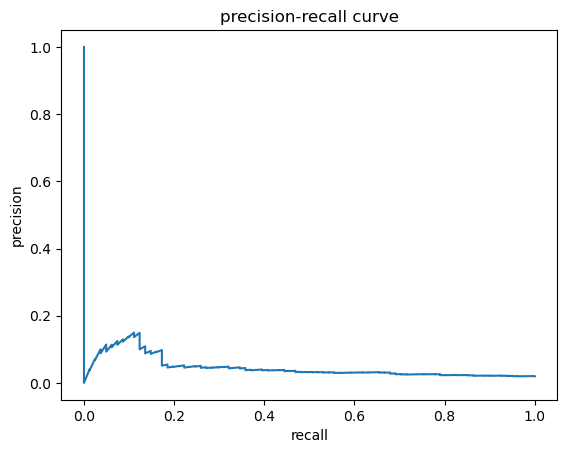

elapsed time: 223.78193402290344
run: 17
{'hidden_channels_list': [64], 'linear_sizes_list': [512], 'gcn_layers_list': 2, 'aggregations_list': [<function global_max_pool at 0x00000167E337D550>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000167DFC25670>, <dgl.data.utils.Subset object at 0x00000167E9BD7F10>, <dgl.data.utils.Subset object at 0x00000167E9BD7A60>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1): GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=64, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  4865
Epoch 0 | Train Loss 0.22337567738511346 | Validation Loss 0.17380635142326356 | Validation accuracy 0.9630399816176471
Epoch 10 | Train Loss 0.1565358191728592 | Validation Loss 0.11877944543957711 | Validation accuracy 0.974609375
Epoch 20 | Train Loss 0.15157057457801068 | Validation Loss 0.14884977638

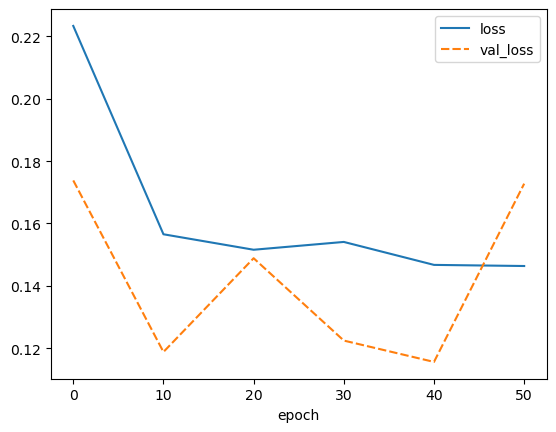

best weights loaded


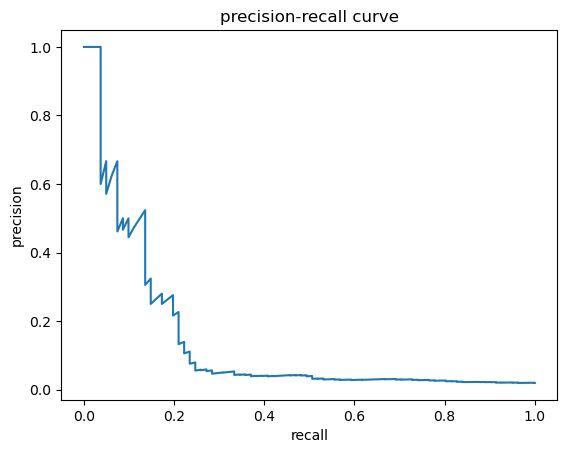

elapsed time: 212.5059952735901
run: 18
{'hidden_channels_list': [64], 'linear_sizes_list': [512], 'gcn_layers_list': 3, 'aggregations_list': [<function global_mean_pool at 0x00000167E3379B80>, <function global_max_pool at 0x00000167E337D550>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000167EA4BBDC0>, <dgl.data.utils.Subset object at 0x000001688E2F0FA0>, <dgl.data.utils.Subset object at 0x000001678999B370>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1-2): 2 x GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=128, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  9089
Epoch 0 | Train Loss 0.23958387022668665 | Validation Loss 0.16773452311754228 | Validation accuracy 0.9630399816176471
Epoch 10 | Train Loss 0.15571293054205 | Validation Loss 0.11372881047427655 | Validation accuracy 0.974609375
Epoch 20 | Train L

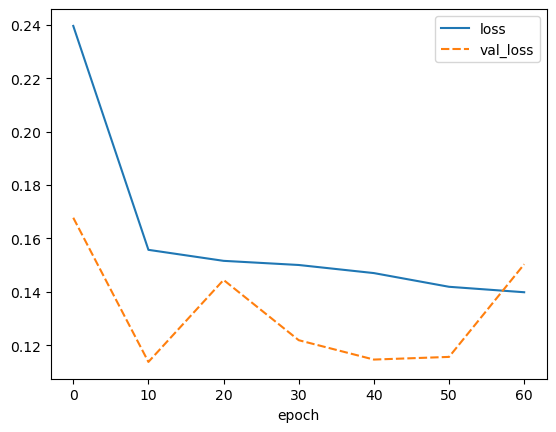

best weights loaded


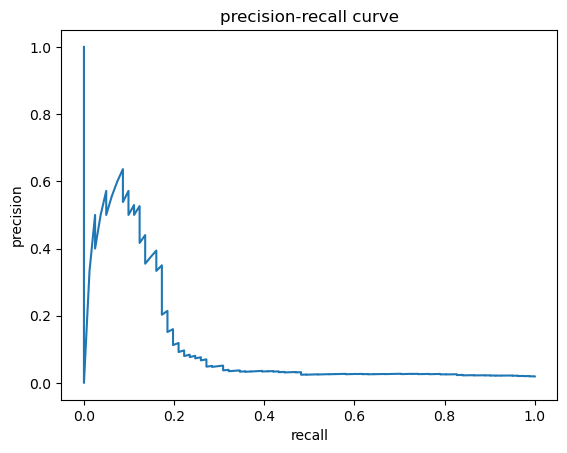

elapsed time: 257.90945768356323
run: 19
{'hidden_channels_list': [64], 'linear_sizes_list': [512], 'gcn_layers_list': 3, 'aggregations_list': [<function global_mean_pool at 0x00000167E3379B80>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000167C6B8AE80>, <dgl.data.utils.Subset object at 0x000001688E2F0AF0>, <dgl.data.utils.Subset object at 0x00000167EA0BE7F0>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1-2): 2 x GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=64, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  9025
Epoch 0 | Train Loss 0.3527664810870633 | Validation Loss 0.15920657515525818 | Validation accuracy 0.9630399816176471
Epoch 10 | Train Loss 0.1626084273060163 | Validation Loss 0.15520750284194945 | Validation accuracy 0.9630399816176471
Epoch 20 | Train Loss 0.15697108096245563 | Validation Loss 

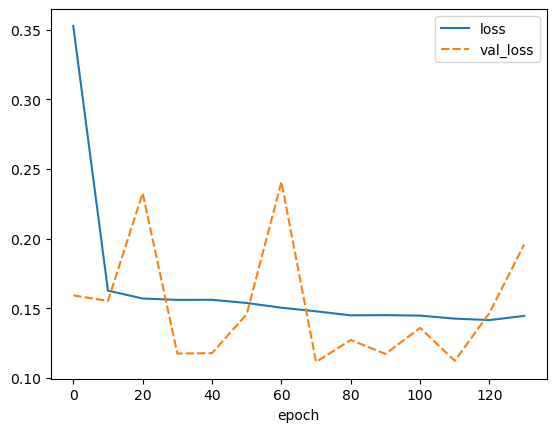

best weights loaded


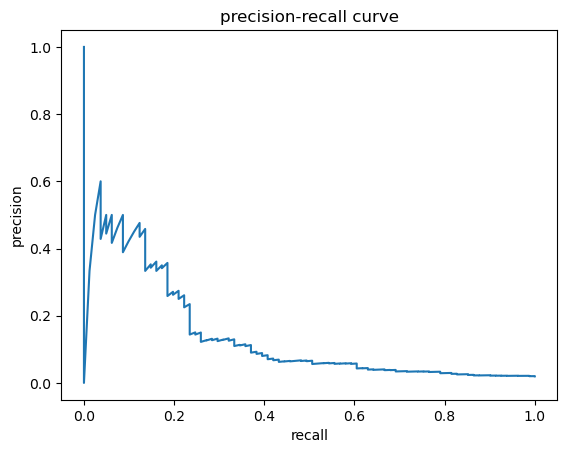

elapsed time: 506.50428891181946
run: 20
{'hidden_channels_list': [64], 'linear_sizes_list': [512], 'gcn_layers_list': 3, 'aggregations_list': [<function global_max_pool at 0x00000167E337D550>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000167EA23F220>, <dgl.data.utils.Subset object at 0x0000016789A537F0>, <dgl.data.utils.Subset object at 0x0000016789A53940>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1-2): 2 x GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=64, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  9025
Epoch 0 | Train Loss 0.29131476761716785 | Validation Loss 0.1299714505672455 | Validation accuracy 0.974609375
Epoch 10 | Train Loss 0.15433927715727777 | Validation Loss 0.1159847941249609 | Validation accuracy 0.974609375
Epoch 20 | Train Loss 0.15529293995915036 | Validation Loss 0.1166964374482

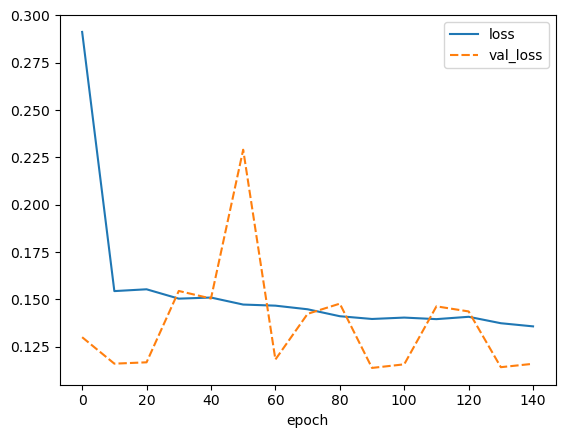

best weights loaded


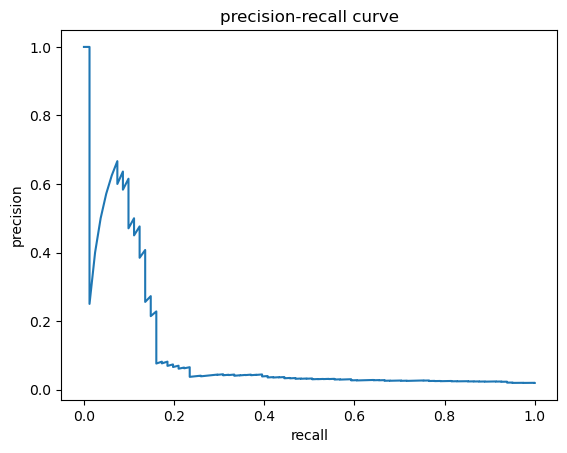

elapsed time: 480.4693982601166
run: 21
{'hidden_channels_list': [64], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x00000167E3379B80>, <function global_max_pool at 0x00000167E337D550>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000167C6BC4520>, <dgl.data.utils.Subset object at 0x000001688E277F70>, <dgl.data.utils.Subset object at 0x000001688E277430>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1-3): 3 x GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=128, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  13249
Epoch 0 | Train Loss 0.24864099061850345 | Validation Loss 0.20503304600715638 | Validation accuracy 0.9514705882352942
Epoch 10 | Train Loss 0.15356729698903632 | Validation Loss 0.15628491193056107 | Validation accuracy 0.9630399816176471
Epoch 2

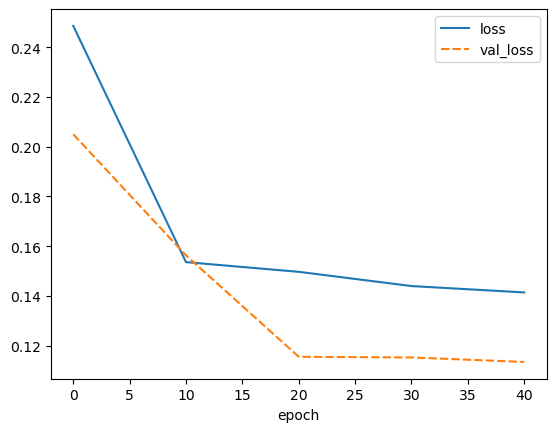

best weights loaded


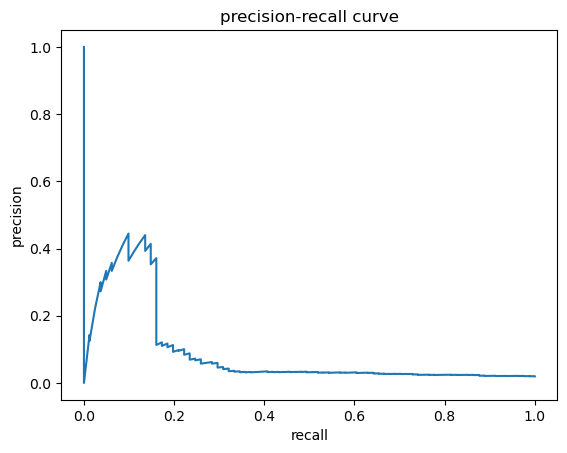

elapsed time: 152.39191913604736
run: 22
{'hidden_channels_list': [64], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x00000167E3379B80>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000167E60AF130>, <dgl.data.utils.Subset object at 0x000001688E29B520>, <dgl.data.utils.Subset object at 0x000001688E2A7970>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1-3): 3 x GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=64, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  13185
Epoch 0 | Train Loss 0.29413091188127344 | Validation Loss 0.16903211772441865 | Validation accuracy 0.9630399816176471
Epoch 10 | Train Loss 0.1603012667460875 | Validation Loss 0.1191019706428051 | Validation accuracy 0.974609375
Epoch 20 | Train Loss 0.15891706401651556 | Validation Loss 0.1845

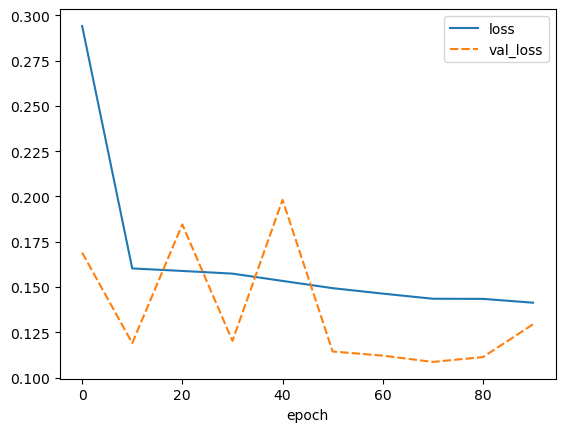

best weights loaded


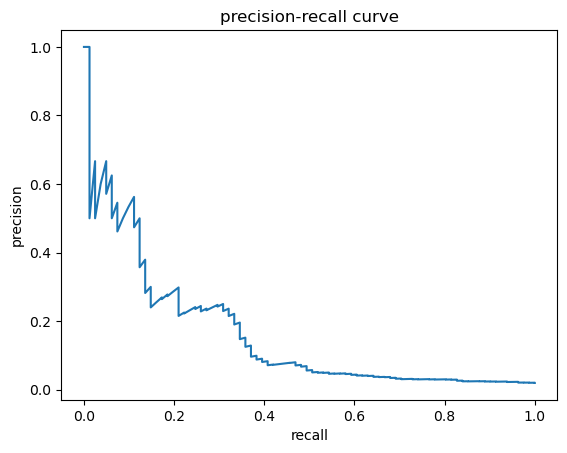

elapsed time: 301.5860970020294
run: 23
{'hidden_channels_list': [64], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x00000167E337D550>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000167EB70ED30>, <dgl.data.utils.Subset object at 0x00000167E9E81D90>, <dgl.data.utils.Subset object at 0x0000016872C29430>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 64)
    (1-3): 3 x GCNConv(64, 64)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=64, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  13185
Epoch 0 | Train Loss 0.33002783222631976 | Validation Loss 0.23378920704126357 | Validation accuracy 0.9514705882352942
Epoch 10 | Train Loss 0.15327450610471494 | Validation Loss 0.11658664941787719 | Validation accuracy 0.974609375
Epoch 20 | Train Loss 0.15046574559175607 | Validation Loss 0.1629

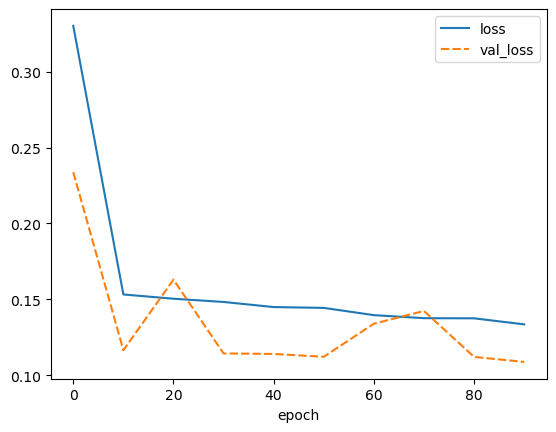

best weights loaded


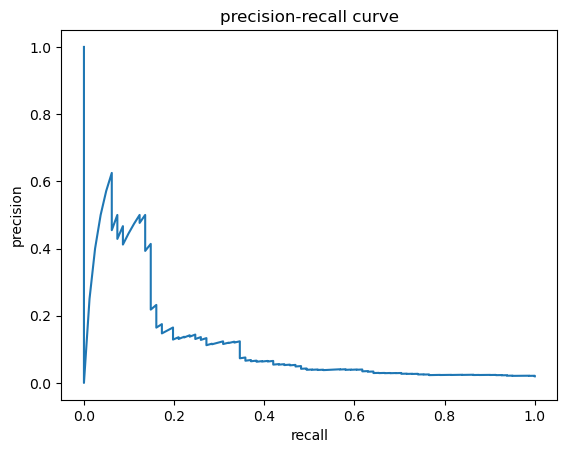

elapsed time: 329.54405188560486
run: 24
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 1, 'aggregations_list': [<function global_mean_pool at 0x00000167E3379B80>, <function global_max_pool at 0x00000167E337D550>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000167E7E30F70>, <dgl.data.utils.Subset object at 0x000001688E10F340>, <dgl.data.utils.Subset object at 0x000001688E10F2E0>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  3073
Epoch 0 | Train Loss 0.252409313890067 | Validation Loss 0.12412594966590404 | Validation accuracy 0.974609375
Epoch 10 | Train Loss 0.15555058532592023 | Validation Loss 0.11862874403595924 | Validation accuracy 0.974609375
Epoch 20 | Train Loss 0.15324134627978006 | Validation 

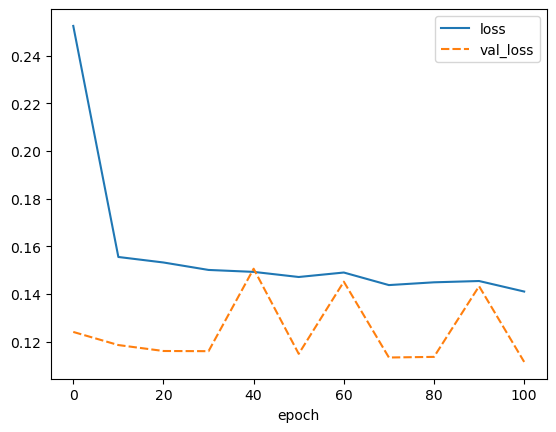

best weights loaded


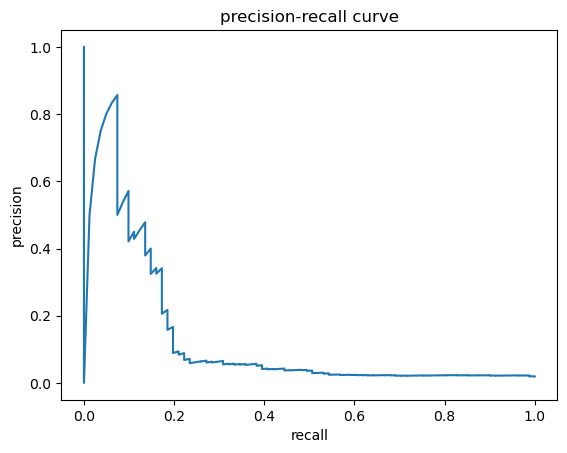

elapsed time: 351.2676305770874
run: 25
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 1, 'aggregations_list': [<function global_mean_pool at 0x00000167E3379B80>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000167DFC25670>, <dgl.data.utils.Subset object at 0x0000016872C54850>, <dgl.data.utils.Subset object at 0x0000016872C540D0>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  2817
Epoch 0 | Train Loss 0.2037603764822989 | Validation Loss 0.11865746043622494 | Validation accuracy 0.974609375
Epoch 10 | Train Loss 0.1597061182061831 | Validation Loss 0.15387665927410127 | Validation accuracy 0.9630399816176471
Epoch 20 | Train Loss 0.15914439432548755 | Validation Loss 0.15362563133239746 | Validation accura

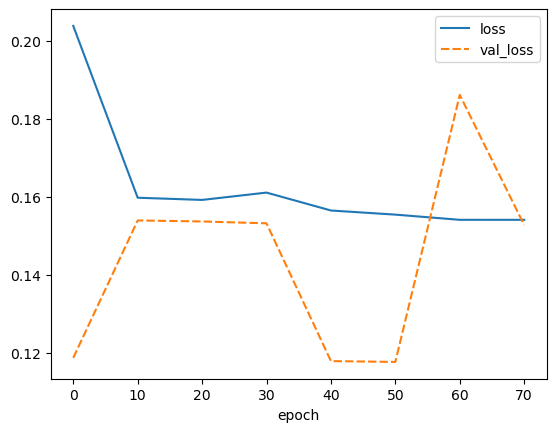

best weights loaded


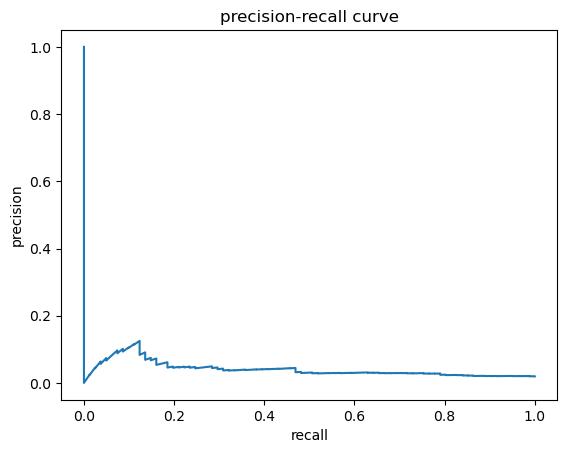

elapsed time: 234.685240983963
run: 26
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 1, 'aggregations_list': [<function global_max_pool at 0x00000167E337D550>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000167EB86F970>, <dgl.data.utils.Subset object at 0x000001688E1F1A60>, <dgl.data.utils.Subset object at 0x000001688E1F1A90>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  2817
Epoch 0 | Train Loss 0.3216976807876067 | Validation Loss 0.265510293841362 | Validation accuracy 0.9399011948529411
Epoch 10 | Train Loss 0.15857360940991025 | Validation Loss 0.15754665732383727 | Validation accuracy 0.9630399816176471
Epoch 20 | Train Loss 0.15584848595388007 | Validation Loss 0.11789766401052475 | Validation ac

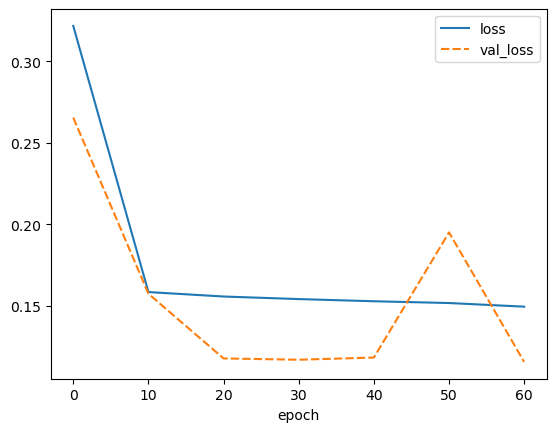

best weights loaded


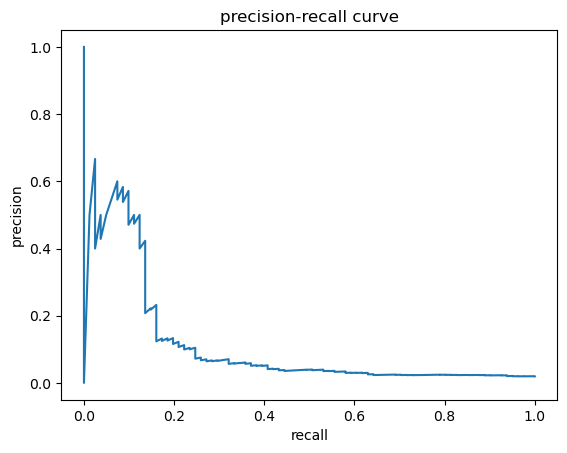

elapsed time: 211.8507957458496
run: 27
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 2, 'aggregations_list': [<function global_mean_pool at 0x00000167E3379B80>, <function global_max_pool at 0x00000167E337D550>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000167EBA982B0>, <dgl.data.utils.Subset object at 0x0000016789939820>, <dgl.data.utils.Subset object at 0x0000016789939D60>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1): GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  68865
Epoch 0 | Train Loss 0.19557223536751486 | Validation Loss 0.223772594332695 | Validation accuracy 0.9399011948529411
Epoch 10 | Train Loss 0.15419094106464676 | Validation Loss 0.15919043123722076 | Validation accuracy 0.9630399816176471
Epoch 20 | Tra

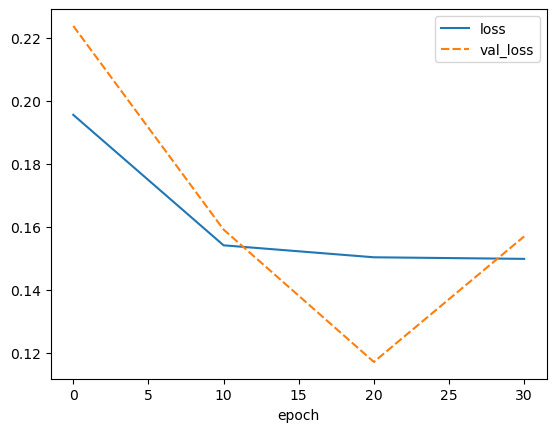

best weights loaded


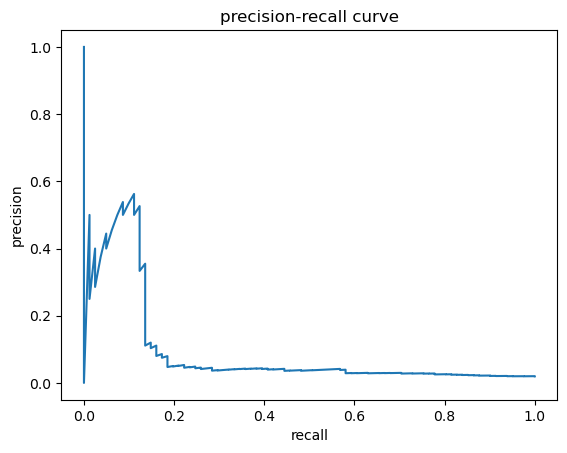

elapsed time: 138.48621320724487
run: 28
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 2, 'aggregations_list': [<function global_mean_pool at 0x00000167E3379B80>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000167E60AF130>, <dgl.data.utils.Subset object at 0x000001687833F580>, <dgl.data.utils.Subset object at 0x000001687833F7F0>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1): GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  68609
Epoch 0 | Train Loss 0.2150035207018708 | Validation Loss 0.12359289526939392 | Validation accuracy 0.974609375
Epoch 10 | Train Loss 0.15838425154938843 | Validation Loss 0.11931396201252938 | Validation accuracy 0.974609375
Epoch 20 | Train Loss 0.15905448839519964 | Validation Loss 0.23374394774436

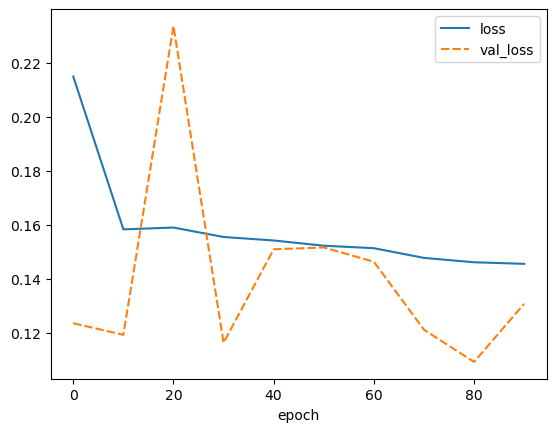

best weights loaded


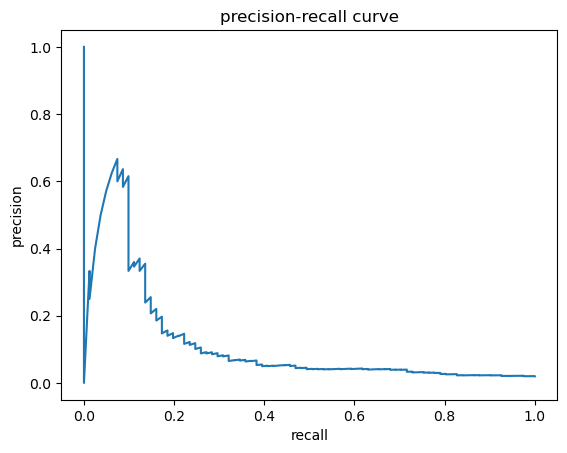

elapsed time: 314.03052973747253
run: 29
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 2, 'aggregations_list': [<function global_max_pool at 0x00000167E337D550>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000167EBEB6BE0>, <dgl.data.utils.Subset object at 0x0000016873DC7040>, <dgl.data.utils.Subset object at 0x0000016873DC7400>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1): GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  68609
Epoch 0 | Train Loss 0.23565991313168497 | Validation Loss 0.13049939945340155 | Validation accuracy 0.974609375
Epoch 10 | Train Loss 0.15336347845467654 | Validation Loss 0.1171930931508541 | Validation accuracy 0.974609375
Epoch 20 | Train Loss 0.15246073359792883 | Validation Loss 0.117659171670675

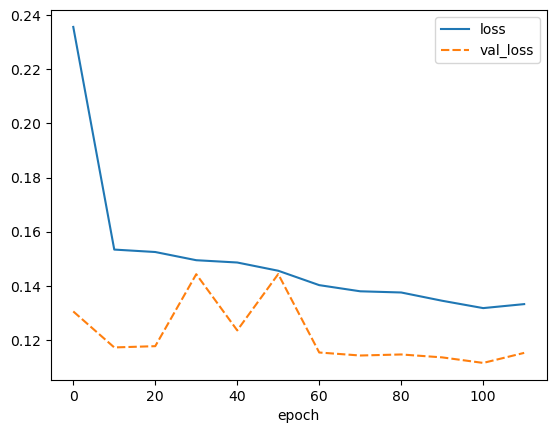

best weights loaded


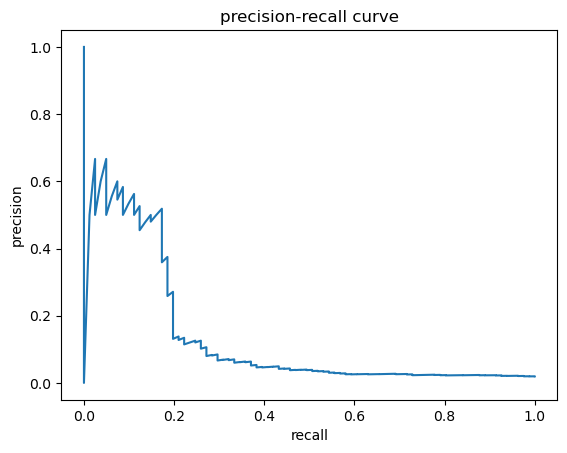

elapsed time: 365.90515542030334
run: 30
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 3, 'aggregations_list': [<function global_mean_pool at 0x00000167E3379B80>, <function global_max_pool at 0x00000167E337D550>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000167ED409EB0>, <dgl.data.utils.Subset object at 0x000001688E29B370>, <dgl.data.utils.Subset object at 0x00000167E9A6E190>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-2): 2 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  134657
Epoch 0 | Train Loss 0.20206139078645996 | Validation Loss 0.12189998663961887 | Validation accuracy 0.974609375
Epoch 10 | Train Loss 0.1509511714631861 | Validation Loss 0.11719706505537034 | Validation accuracy 0.974609375
Epoch 20 | Train Lo

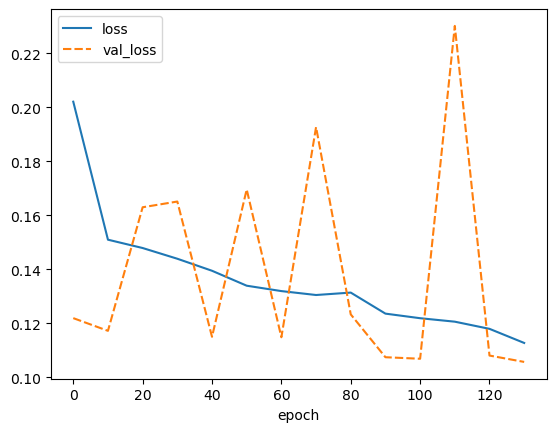

best weights loaded


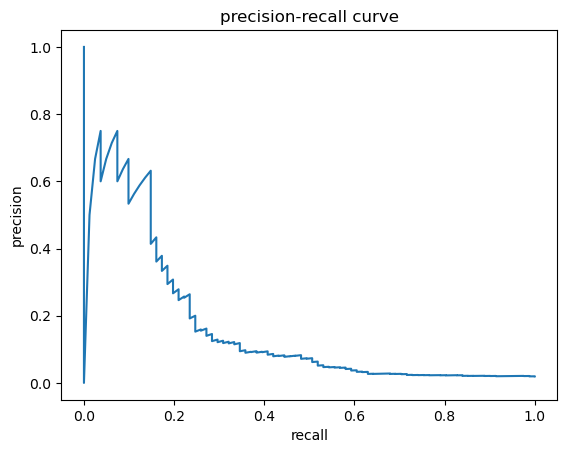

elapsed time: 475.22914123535156
run: 31
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 3, 'aggregations_list': [<function global_mean_pool at 0x00000167E3379B80>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000167EB6ADCD0>, <dgl.data.utils.Subset object at 0x00000167E9A6E970>, <dgl.data.utils.Subset object at 0x00000167E9A6E1C0>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-2): 2 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  134401
Epoch 0 | Train Loss 0.20295384187589993 | Validation Loss 0.1251855321228504 | Validation accuracy 0.974609375
Epoch 10 | Train Loss 0.1606999019330198 | Validation Loss 0.11961144730448722 | Validation accuracy 0.974609375
Epoch 20 | Train Loss 0.15733916109258478 | Validation Loss 0.15367749

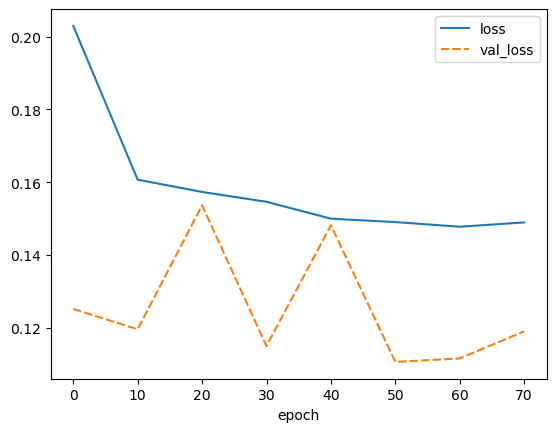

best weights loaded


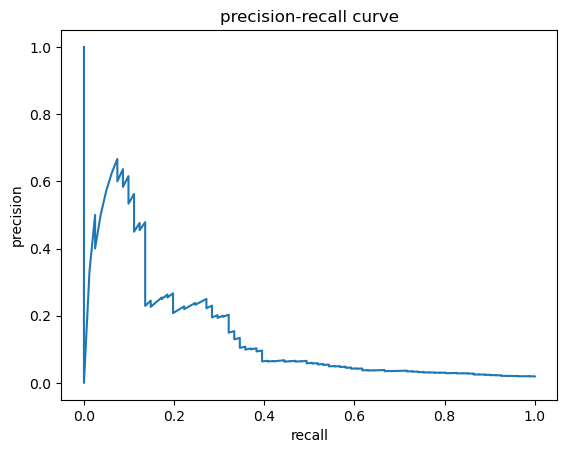

elapsed time: 279.0301489830017
run: 32
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 3, 'aggregations_list': [<function global_max_pool at 0x00000167E337D550>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000167ED478880>, <dgl.data.utils.Subset object at 0x000001688E253EB0>, <dgl.data.utils.Subset object at 0x000001688F303160>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-2): 2 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  134401
Epoch 0 | Train Loss 0.20476181037498242 | Validation Loss 0.12473208531737327 | Validation accuracy 0.974609375
Epoch 10 | Train Loss 0.15510544496955295 | Validation Loss 0.11821640506386757 | Validation accuracy 0.974609375
Epoch 20 | Train Loss 0.14966365311181906 | Validation Loss 0.12290436

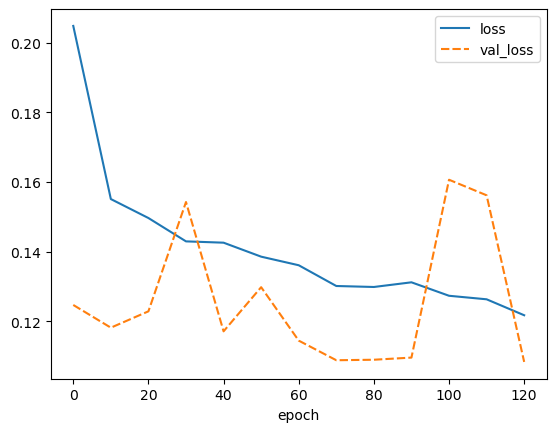

best weights loaded


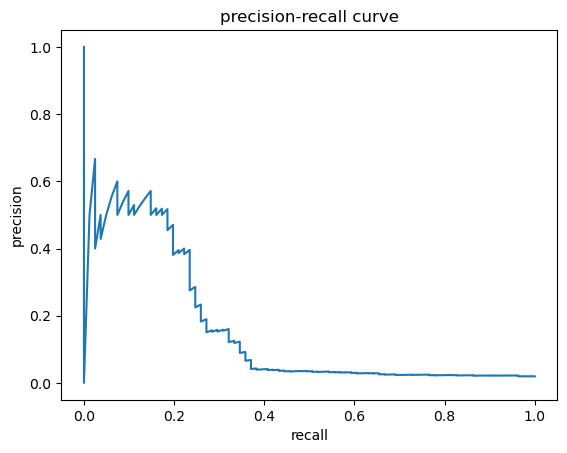

elapsed time: 447.5980496406555
run: 33
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x00000167E3379B80>, <function global_max_pool at 0x00000167E337D550>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000167EBFA8910>, <dgl.data.utils.Subset object at 0x00000167EBFFCD30>, <dgl.data.utils.Subset object at 0x00000167EBFFCBE0>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  200449
Epoch 0 | Train Loss 0.2056960819119757 | Validation Loss 0.16067384481430053 | Validation accuracy 0.9630399816176471
Epoch 10 | Train Loss 0.1505952033806931 | Validation Loss 0.11706034578382969 | Validation accuracy 0.974609375
Epoch 20 | Tra

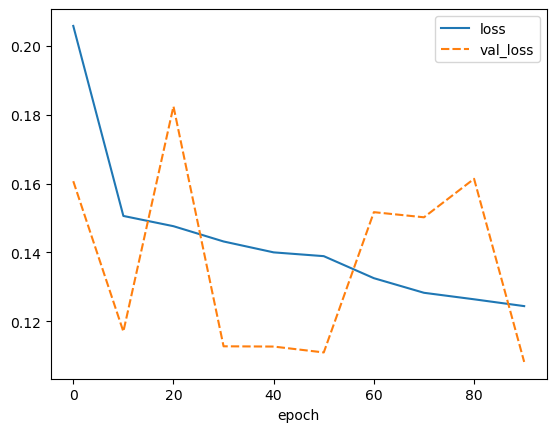

best weights loaded


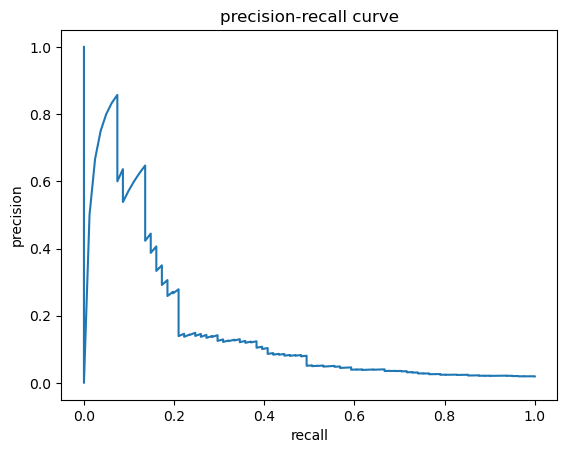

elapsed time: 324.52733969688416
run: 34
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x00000167E3379B80>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000167DFC3BD60>, <dgl.data.utils.Subset object at 0x00000167EBFFC610>, <dgl.data.utils.Subset object at 0x0000016873C5F4F0>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  200193
Epoch 0 | Train Loss 0.2288457164258668 | Validation Loss 0.15963346064090728 | Validation accuracy 0.9630399816176471
Epoch 10 | Train Loss 0.16030202128670432 | Validation Loss 0.11928922086954116 | Validation accuracy 0.974609375
Epoch 20 | Train Loss 0.15410736124172356 | Validation Loss 0.

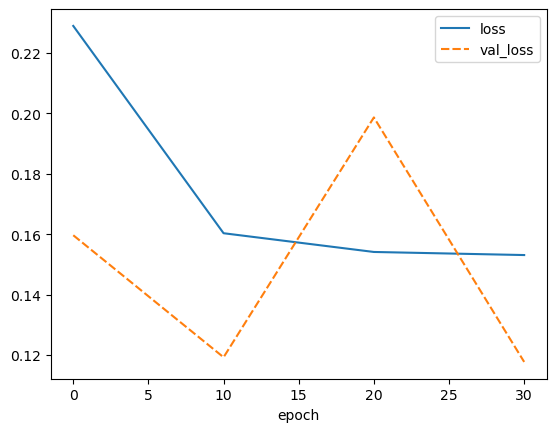

best weights loaded


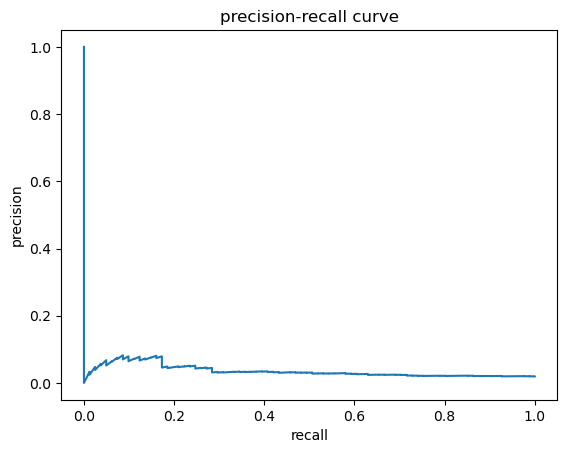

elapsed time: 128.32900667190552
run: 35
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x00000167E337D550>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000167ED3DF850>, <dgl.data.utils.Subset object at 0x0000016873C5F8E0>, <dgl.data.utils.Subset object at 0x00000168922BA220>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  200193
Epoch 0 | Train Loss 0.20693078682278143 | Validation Loss 0.16553950011730195 | Validation accuracy 0.9630399816176471
Epoch 10 | Train Loss 0.15273639604900824 | Validation Loss 0.11573293581604957 | Validation accuracy 0.974609375
Epoch 20 | Train Loss 0.1510739918007995 | Validation Loss 0.1

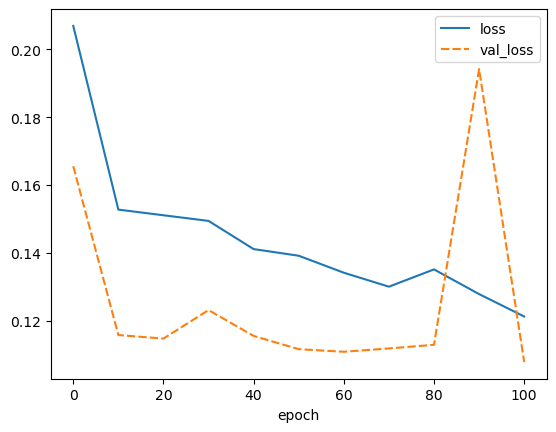

best weights loaded


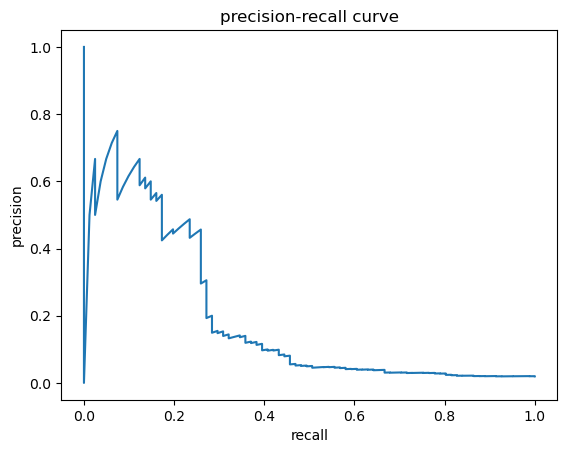

elapsed time: 360.9104166030884
run: 36
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 1, 'aggregations_list': [<function global_mean_pool at 0x00000167E3379B80>, <function global_max_pool at 0x00000167E337D550>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000167E9D54910>, <dgl.data.utils.Subset object at 0x00000167899C4370>, <dgl.data.utils.Subset object at 0x00000167899C48B0>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  3073
Epoch 0 | Train Loss 0.21145943642565698 | Validation Loss 0.16559168994426726 | Validation accuracy 0.9630399816176471
Epoch 10 | Train Loss 0.1595038387811545 | Validation Loss 0.23100720942020417 | Validation accuracy 0.9399011948529411
Epoch 20 | Train Loss 0.15542511483936

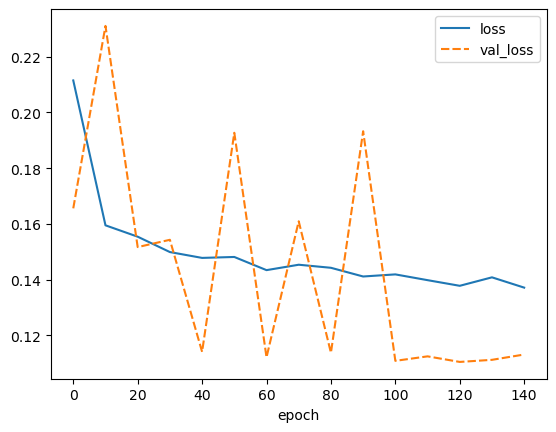

best weights loaded


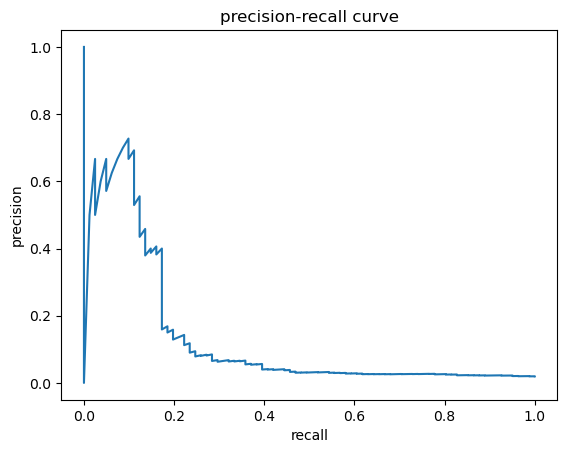

elapsed time: 424.5351605415344
run: 37
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 1, 'aggregations_list': [<function global_mean_pool at 0x00000167E3379B80>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000167ED5E57C0>, <dgl.data.utils.Subset object at 0x0000016873C5F130>, <dgl.data.utils.Subset object at 0x0000016873C5F460>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  2817
Epoch 0 | Train Loss 0.23274874958125027 | Validation Loss 0.11848235763609409 | Validation accuracy 0.974609375
Epoch 10 | Train Loss 0.16234841152574075 | Validation Loss 0.1193221278488636 | Validation accuracy 0.974609375
Epoch 20 | Train Loss 0.15659334826650043 | Validation Loss 0.1161092896014452 | Validation accuracy 0

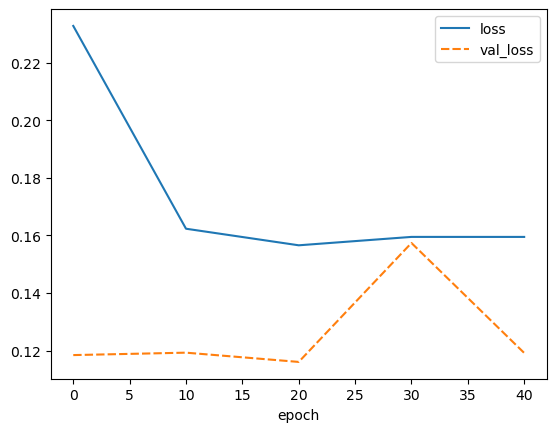

best weights loaded


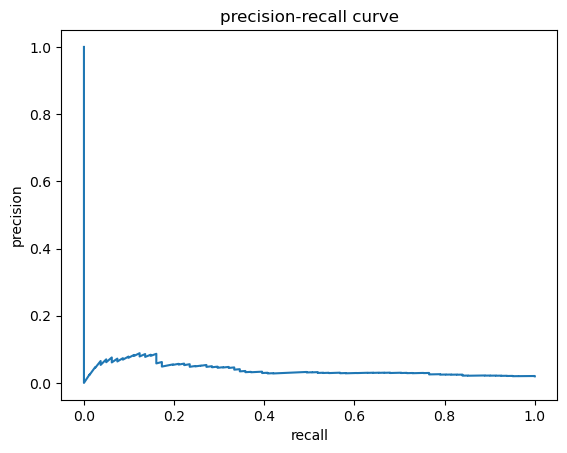

elapsed time: 129.09584832191467
run: 38
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 1, 'aggregations_list': [<function global_max_pool at 0x00000167E337D550>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000167EDB89550>, <dgl.data.utils.Subset object at 0x000001688E2C7CA0>, <dgl.data.utils.Subset object at 0x000001688E2C7F10>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  2817
Epoch 0 | Train Loss 0.2549631254691066 | Validation Loss 0.1266749307513237 | Validation accuracy 0.974609375
Epoch 10 | Train Loss 0.15802660990845074 | Validation Loss 0.1207720898091793 | Validation accuracy 0.974609375
Epoch 20 | Train Loss 0.15740919022849112 | Validation Loss 0.20099378675222396 | Validation accuracy 0.

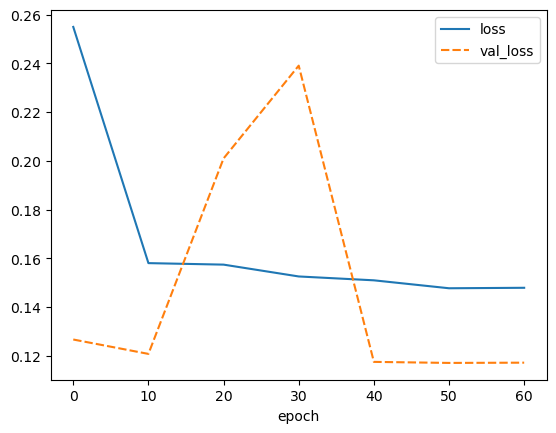

best weights loaded


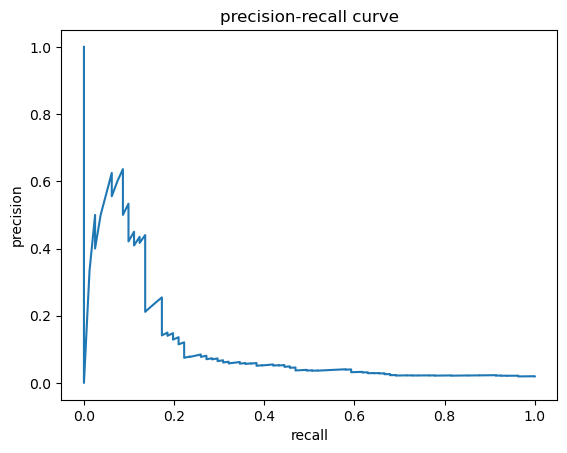

elapsed time: 192.18723893165588
run: 39
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 2, 'aggregations_list': [<function global_mean_pool at 0x00000167E3379B80>, <function global_max_pool at 0x00000167E337D550>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000167EDC42880>, <dgl.data.utils.Subset object at 0x000001688E12E280>, <dgl.data.utils.Subset object at 0x000001688E12E850>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1): GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  68865
Epoch 0 | Train Loss 0.2188568011377797 | Validation Loss 0.20183970630168915 | Validation accuracy 0.9514705882352942
Epoch 10 | Train Loss 0.15616485341028732 | Validation Loss 0.113762990757823 | Validation accuracy 0.974609375
Epoch 20 | Train L

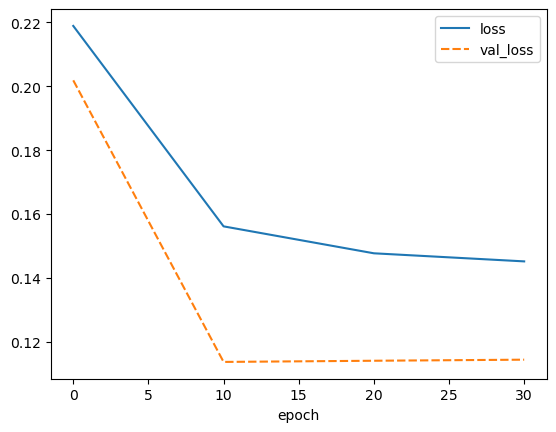

best weights loaded


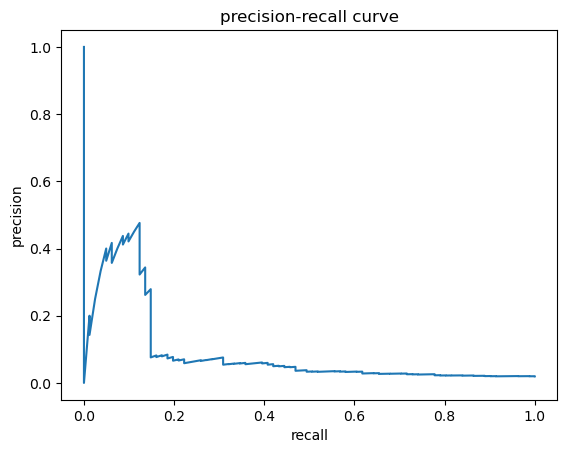

elapsed time: 124.71654605865479
run: 40
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 2, 'aggregations_list': [<function global_mean_pool at 0x00000167E3379B80>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000167E82DB3D0>, <dgl.data.utils.Subset object at 0x000001688E12E790>, <dgl.data.utils.Subset object at 0x000001688E12EC40>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1): GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  68609
Epoch 0 | Train Loss 0.22696798814065527 | Validation Loss 0.12120342329144478 | Validation accuracy 0.974609375
Epoch 10 | Train Loss 0.1577817892486399 | Validation Loss 0.19392988532781602 | Validation accuracy 0.9514705882352942
Epoch 20 | Train Loss 0.15789304380164002 | Validation Loss 0.1199

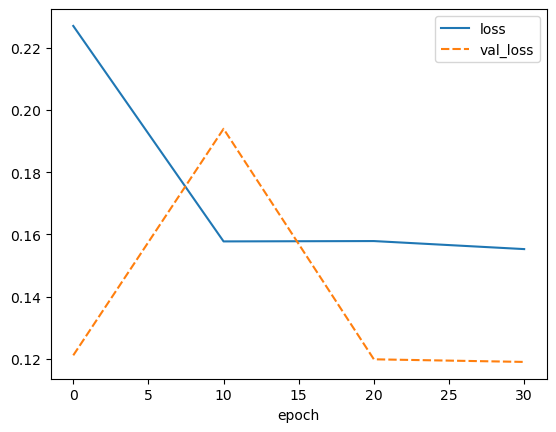

best weights loaded


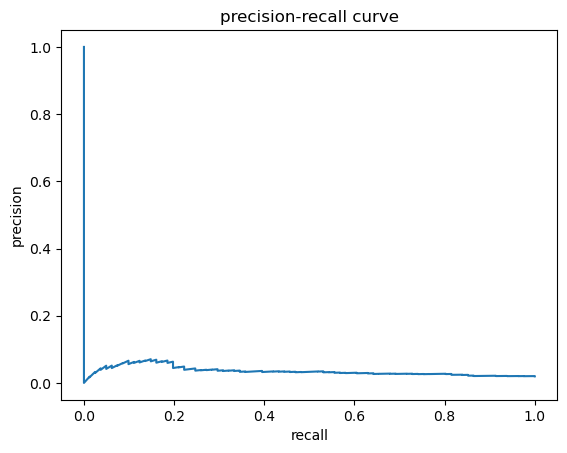

elapsed time: 112.87714266777039
run: 41
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 2, 'aggregations_list': [<function global_max_pool at 0x00000167E337D550>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000167EEEEC460>, <dgl.data.utils.Subset object at 0x0000016789A403D0>, <dgl.data.utils.Subset object at 0x0000016789A403A0>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1): GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  68609
Epoch 0 | Train Loss 0.2393353646903327 | Validation Loss 0.17732625603675842 | Validation accuracy 0.9630399816176471
Epoch 10 | Train Loss 0.15446653826670212 | Validation Loss 0.11796304062008858 | Validation accuracy 0.974609375
Epoch 20 | Train Loss 0.1504548036239364 | Validation Loss 0.115114

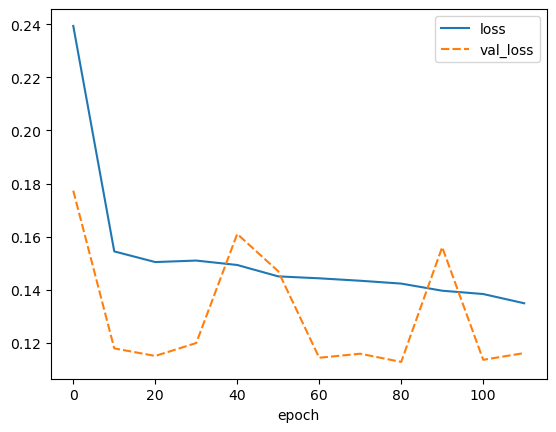

best weights loaded


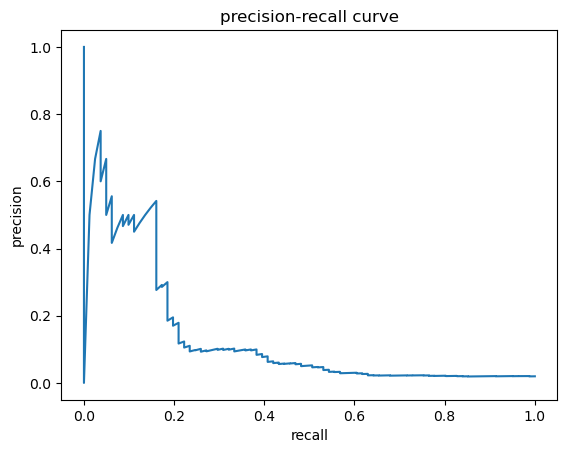

elapsed time: 364.20578479766846
run: 42
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 3, 'aggregations_list': [<function global_mean_pool at 0x00000167E3379B80>, <function global_max_pool at 0x00000167E337D550>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000167EB890C10>, <dgl.data.utils.Subset object at 0x000001688E12E760>, <dgl.data.utils.Subset object at 0x00000167ED4ECAF0>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-2): 2 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  134657
Epoch 0 | Train Loss 0.20132028966239005 | Validation Loss 0.2032905787229538 | Validation accuracy 0.9514705882352942
Epoch 10 | Train Loss 0.15363038940863175 | Validation Loss 0.19329549074172975 | Validation accuracy 0.9514705882352942
Ep

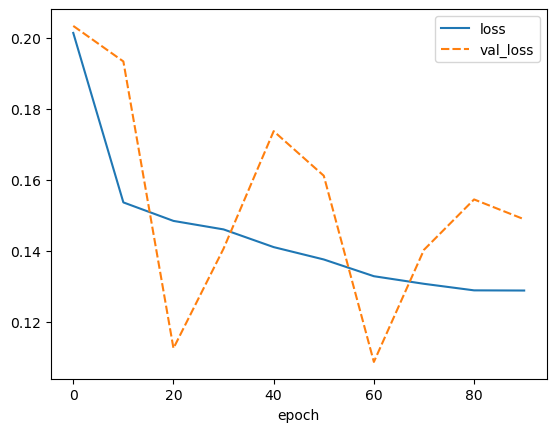

best weights loaded


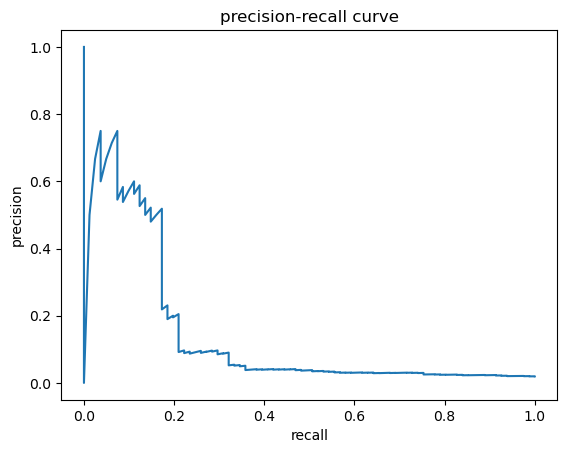

elapsed time: 351.97286224365234
run: 43
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 3, 'aggregations_list': [<function global_mean_pool at 0x00000167E3379B80>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000167EDA80E20>, <dgl.data.utils.Subset object at 0x0000016789A29640>, <dgl.data.utils.Subset object at 0x0000016789A29AF0>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-2): 2 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  134401
Epoch 0 | Train Loss 0.1957271419691317 | Validation Loss 0.11913947612047196 | Validation accuracy 0.974609375
Epoch 10 | Train Loss 0.1573251968983448 | Validation Loss 0.1168417640030384 | Validation accuracy 0.974609375
Epoch 20 | Train Loss 0.1565190242095427 | Validation Loss 0.1186978

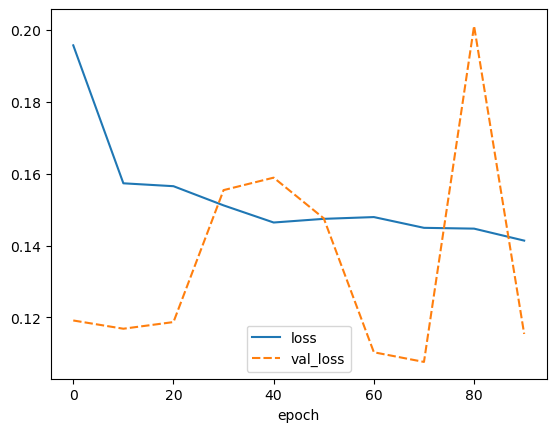

best weights loaded


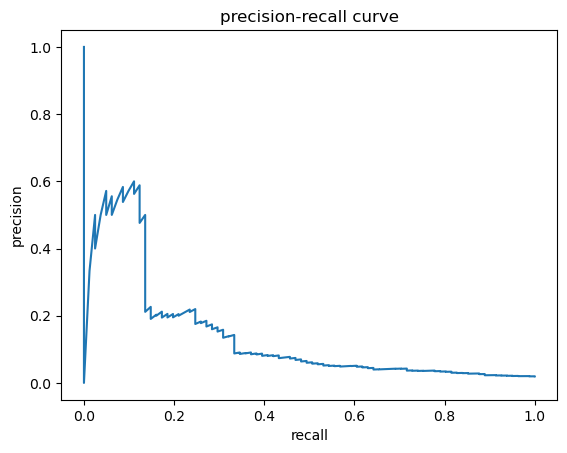

elapsed time: 338.5673871040344
run: 44
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 3, 'aggregations_list': [<function global_max_pool at 0x00000167E337D550>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000167E8093F70>, <dgl.data.utils.Subset object at 0x0000016892331F70>, <dgl.data.utils.Subset object at 0x0000016789A3C610>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-2): 2 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  134401
Epoch 0 | Train Loss 0.2024771316033421 | Validation Loss 0.12578549534082412 | Validation accuracy 0.974609375
Epoch 10 | Train Loss 0.15350746860106787 | Validation Loss 0.16681958138942718 | Validation accuracy 0.9630399816176471
Epoch 20 | Train Loss 0.14818543827894962 | Validation Loss 0

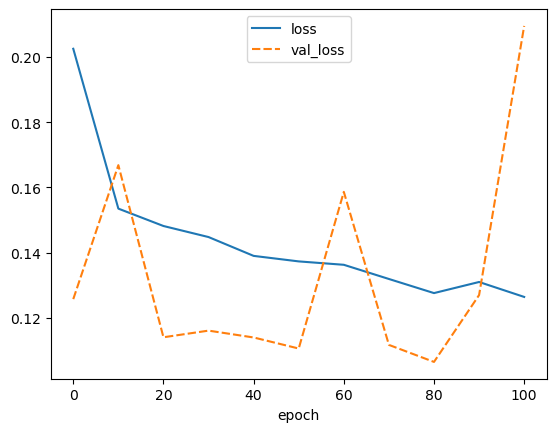

best weights loaded


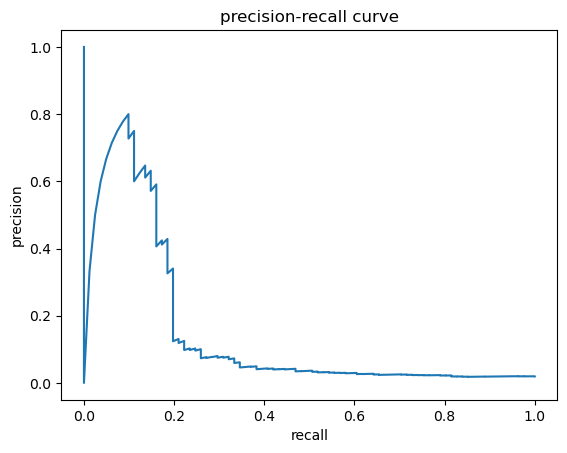

elapsed time: 398.20668625831604
run: 45
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x00000167E3379B80>, <function global_max_pool at 0x00000167E337D550>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000167EEE0AD00>, <dgl.data.utils.Subset object at 0x0000016789A3CD60>, <dgl.data.utils.Subset object at 0x0000016789A4C1C0>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  200449
Epoch 0 | Train Loss 0.20615446161140094 | Validation Loss 0.12798530533909797 | Validation accuracy 0.974609375
Epoch 10 | Train Loss 0.1519932494019017 | Validation Loss 0.15331155359745025 | Validation accuracy 0.9630399816176471
Epoch 20 

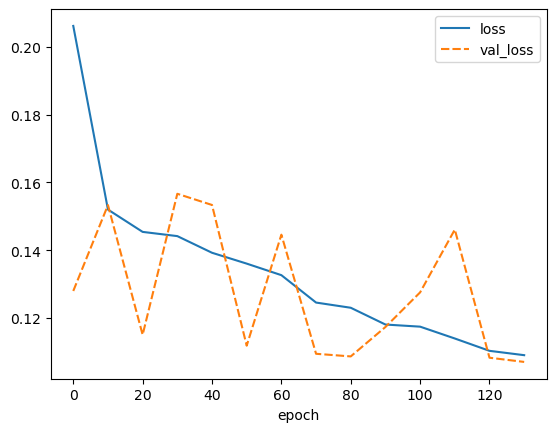

best weights loaded


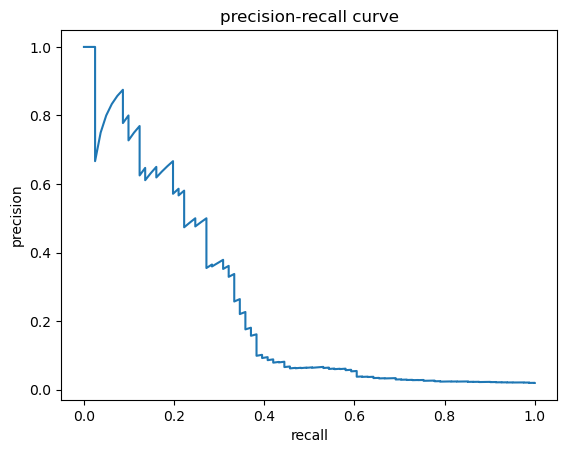

elapsed time: 568.4743642807007
run: 46
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x00000167E3379B80>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000167C6B8AE80>, <dgl.data.utils.Subset object at 0x0000016789A4CCD0>, <dgl.data.utils.Subset object at 0x00000168923A1100>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  200193
Epoch 0 | Train Loss 0.20821414549242367 | Validation Loss 0.2012695550918579 | Validation accuracy 0.9514705882352942
Epoch 10 | Train Loss 0.158932920432452 | Validation Loss 0.11884650066494942 | Validation accuracy 0.974609375
Epoch 20 | Train Loss 0.15575523855108203 | Validation Loss 0.

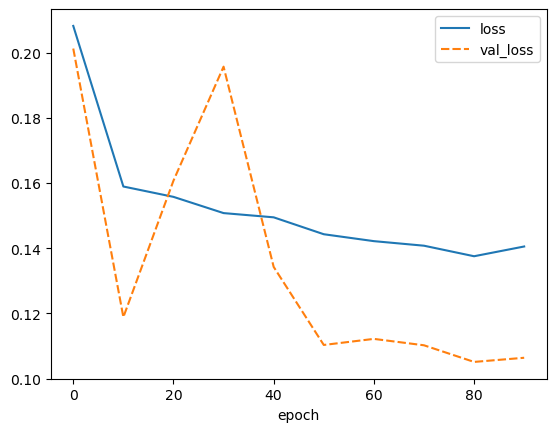

best weights loaded


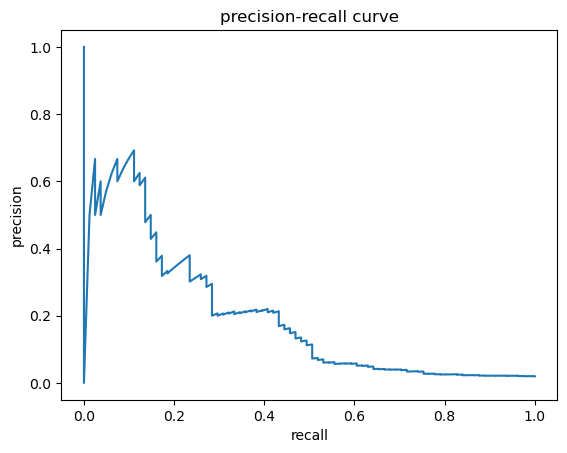

elapsed time: 364.0128176212311
run: 47
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x00000167E337D550>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000167EF742400>, <dgl.data.utils.Subset object at 0x00000168923A1D00>, <dgl.data.utils.Subset object at 0x00000168923A1EE0>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  200193
Epoch 0 | Train Loss 0.2271179353648966 | Validation Loss 0.1254788689315319 | Validation accuracy 0.974609375
Epoch 10 | Train Loss 0.15408232514605377 | Validation Loss 0.18521279245615005 | Validation accuracy 0.9514705882352942
Epoch 20 | Train Loss 0.15365024001309366 | Validation Loss 0.

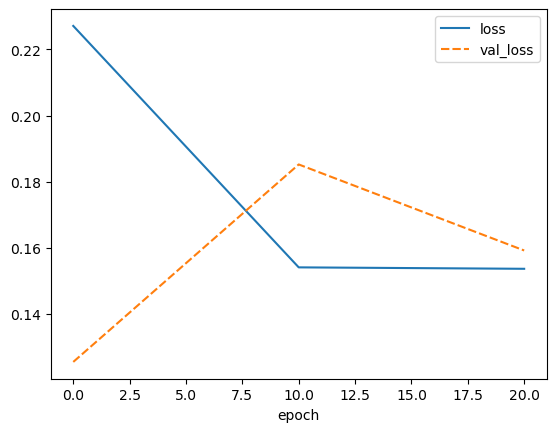

best weights loaded


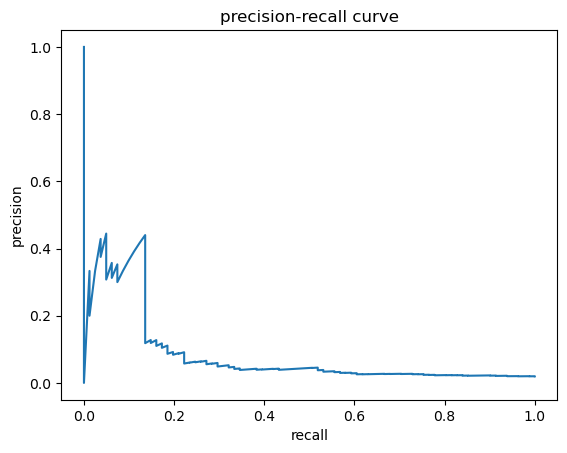

elapsed time: 131.85455536842346
run: 48
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 1, 'aggregations_list': [<function global_mean_pool at 0x00000167E3379B80>, <function global_max_pool at 0x00000167E337D550>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000167E8062B80>, <dgl.data.utils.Subset object at 0x0000016789A3C400>, <dgl.data.utils.Subset object at 0x0000016789A3C910>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=1024, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  6145
Epoch 0 | Train Loss 0.24192486161535437 | Validation Loss 0.16692733466625215 | Validation accuracy 0.9630399816176471
Epoch 10 | Train Loss 0.15471343944470087 | Validation Loss 0.15196581780910492 | Validation accuracy 0.9630399816176471
Epoch 20 | Train Loss 0.15427486011476

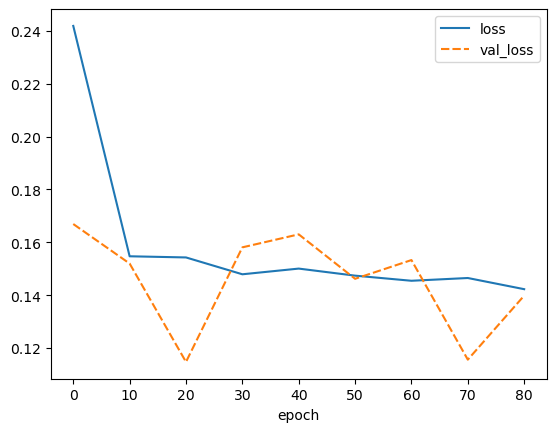

best weights loaded


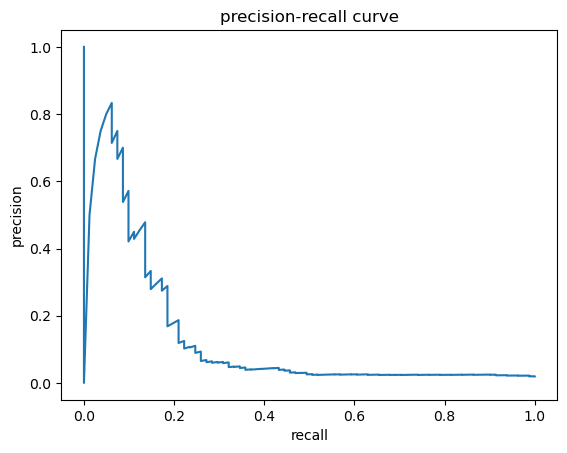

elapsed time: 319.85202836990356
run: 49
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 1, 'aggregations_list': [<function global_mean_pool at 0x00000167E3379B80>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000167EF8EB610>, <dgl.data.utils.Subset object at 0x000001687DDC7550>, <dgl.data.utils.Subset object at 0x000001687DDC76A0>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  5633
Epoch 0 | Train Loss 0.2419138609459906 | Validation Loss 0.16507442593574523 | Validation accuracy 0.9630399816176471
Epoch 10 | Train Loss 0.15952524904048804 | Validation Loss 0.11819697692990302 | Validation accuracy 0.974609375
Epoch 20 | Train Loss 0.15902317383072592 | Validation Loss 0.15317883044481279 | Validation accu

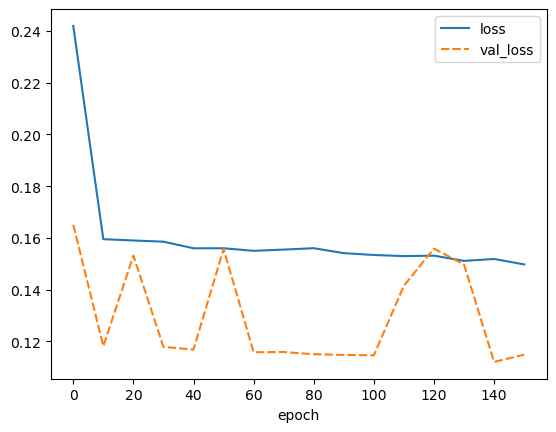

best weights loaded


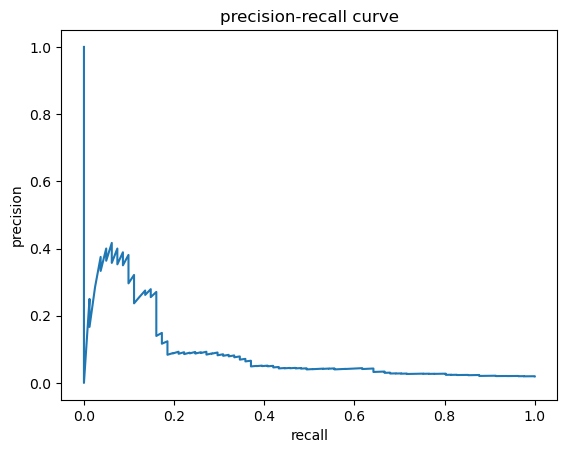

elapsed time: 490.8293602466583
run: 50
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 1, 'aggregations_list': [<function global_max_pool at 0x00000167E337D550>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000167EF8EB730>, <dgl.data.utils.Subset object at 0x00000167EDB4E460>, <dgl.data.utils.Subset object at 0x000001687DDC7D60>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  5633
Epoch 0 | Train Loss 0.21745384552262045 | Validation Loss 0.12496209777891636 | Validation accuracy 0.974609375
Epoch 10 | Train Loss 0.15522507149161716 | Validation Loss 0.1194628830999136 | Validation accuracy 0.974609375
Epoch 20 | Train Loss 0.15122653024666238 | Validation Loss 0.16194405555725097 | Validation accuracy 0.96

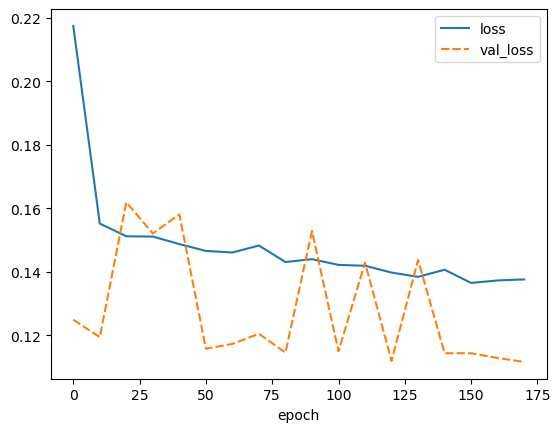

best weights loaded


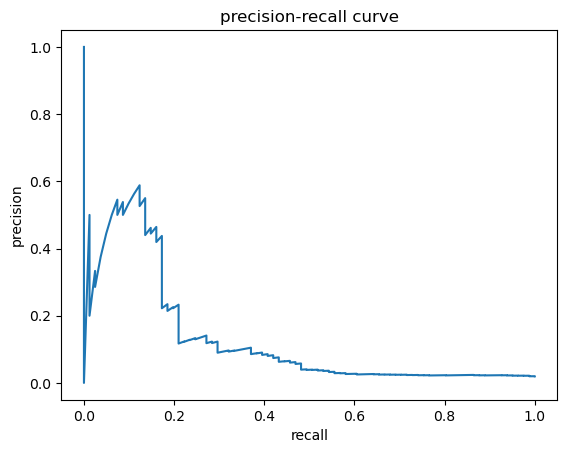

elapsed time: 642.1845917701721
run: 51
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 2, 'aggregations_list': [<function global_mean_pool at 0x00000167E3379B80>, <function global_max_pool at 0x00000167E337D550>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000167F0B75F70>, <dgl.data.utils.Subset object at 0x00000167C199B610>, <dgl.data.utils.Subset object at 0x00000167C199B880>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1): GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=1024, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  268801
Epoch 0 | Train Loss 0.20660721623536313 | Validation Loss 0.1656063050031662 | Validation accuracy 0.9630399816176471
Epoch 10 | Train Loss 0.15652043214350037 | Validation Loss 0.11855994388461114 | Validation accuracy 0.974609375
Epoch 20 | Train L

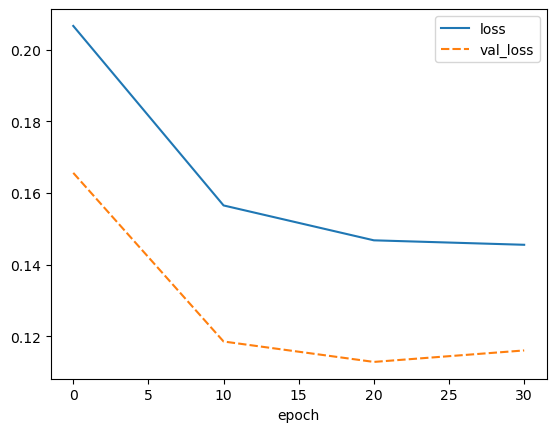

best weights loaded


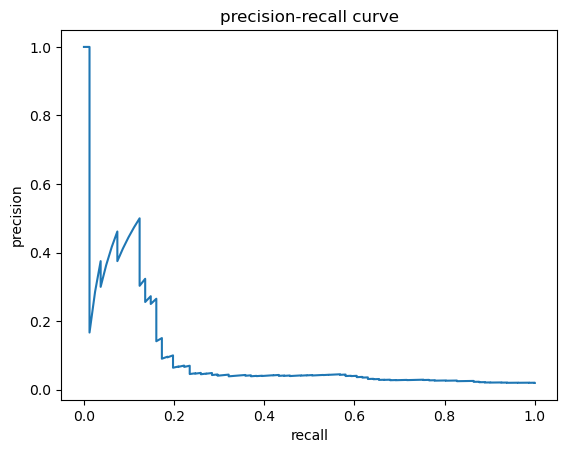

elapsed time: 164.9972746372223
run: 52
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 2, 'aggregations_list': [<function global_mean_pool at 0x00000167E3379B80>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000167EDC07970>, <dgl.data.utils.Subset object at 0x00000167C19C6BB0>, <dgl.data.utils.Subset object at 0x00000167C19C6190>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1): GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  268289
Epoch 0 | Train Loss 0.2119246260686354 | Validation Loss 0.13103207424283028 | Validation accuracy 0.974609375
Epoch 10 | Train Loss 0.15578242752588156 | Validation Loss 0.16351647078990936 | Validation accuracy 0.9630399816176471
Epoch 20 | Train Loss 0.15652059334697146 | Validation Loss 0.1910414

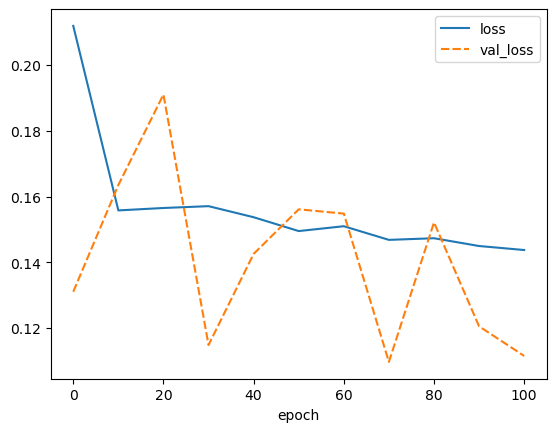

best weights loaded


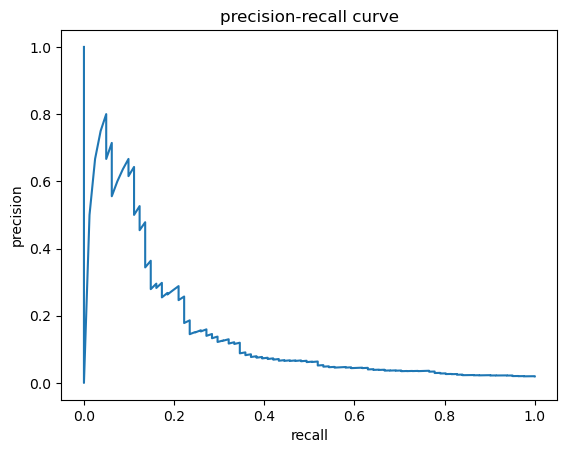

elapsed time: 444.36707401275635
run: 53
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 2, 'aggregations_list': [<function global_max_pool at 0x00000167E337D550>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000167F0DD0D90>, <dgl.data.utils.Subset object at 0x00000167C199B490>, <dgl.data.utils.Subset object at 0x00000167C199BA60>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1): GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  268289
Epoch 0 | Train Loss 0.19875927495233942 | Validation Loss 0.20147784054279327 | Validation accuracy 0.9514705882352942
Epoch 10 | Train Loss 0.15437604238589606 | Validation Loss 0.15673955380916596 | Validation accuracy 0.9630399816176471
Epoch 20 | Train Loss 0.1512082451672265 | Validation Loss 0.

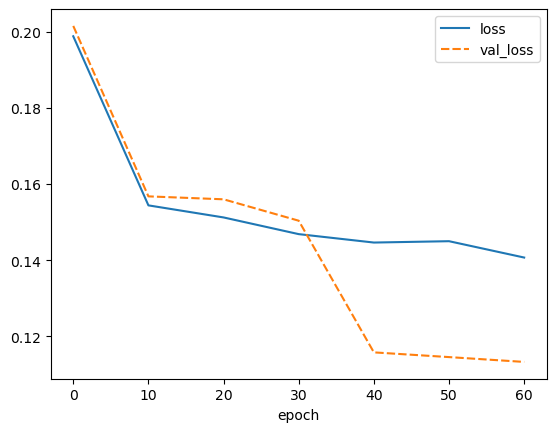

best weights loaded


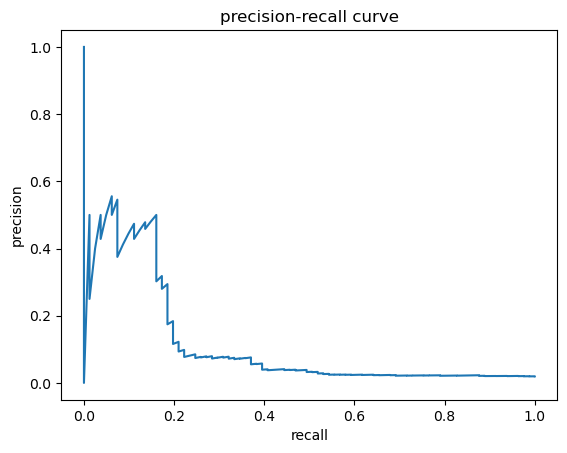

elapsed time: 291.0378096103668
run: 54
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 3, 'aggregations_list': [<function global_mean_pool at 0x00000167E3379B80>, <function global_max_pool at 0x00000167E337D550>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000167F09BF880>, <dgl.data.utils.Subset object at 0x00000167899CC820>, <dgl.data.utils.Subset object at 0x00000167899CCD30>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-2): 2 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=1024, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  531457
Epoch 0 | Train Loss 0.20526095457149274 | Validation Loss 0.13111670240759848 | Validation accuracy 0.974609375
Epoch 10 | Train Loss 0.15089135978258017 | Validation Loss 0.1568095177412033 | Validation accuracy 0.9630399816176471
Epoch 20 | T

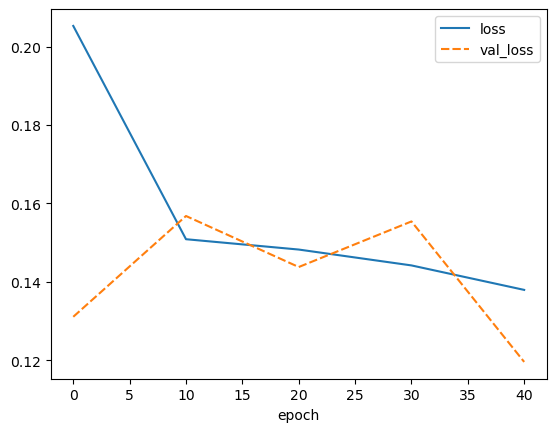

best weights loaded


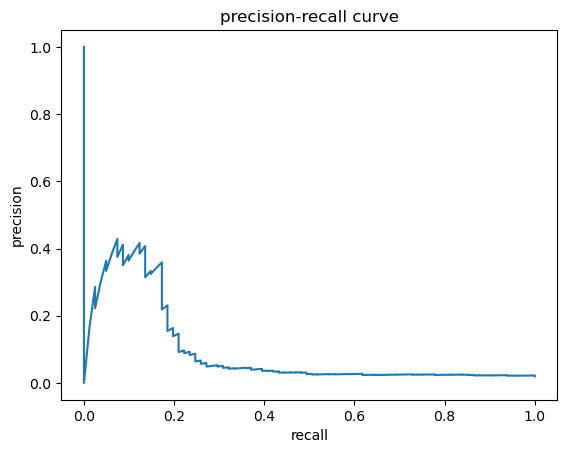

elapsed time: 232.40859270095825
run: 55
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 3, 'aggregations_list': [<function global_mean_pool at 0x00000167E3379B80>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000167F0EF4B20>, <dgl.data.utils.Subset object at 0x00000167899CC400>, <dgl.data.utils.Subset object at 0x00000168922CF070>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-2): 2 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  530945
Epoch 0 | Train Loss 0.19323400882157413 | Validation Loss 0.12587109208106995 | Validation accuracy 0.974609375
Epoch 10 | Train Loss 0.15646630977139328 | Validation Loss 0.1607264071702957 | Validation accuracy 0.9630399816176471
Epoch 20 | Train Loss 0.15818473561243576 | Validation Loss 0.

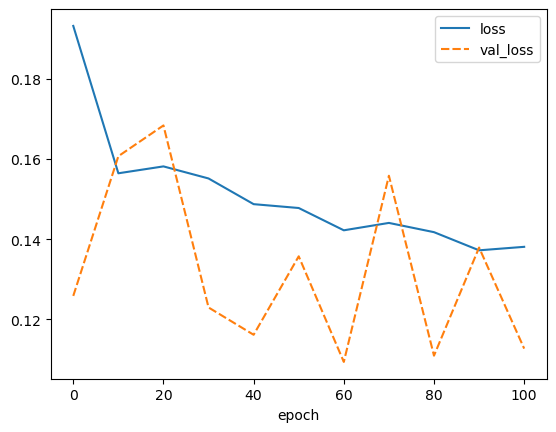

best weights loaded


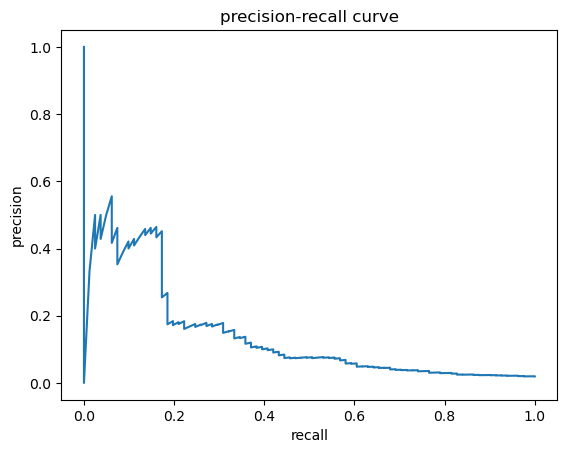

elapsed time: 489.63214802742004
run: 56
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 3, 'aggregations_list': [<function global_max_pool at 0x00000167E337D550>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000167F0C8B100>, <dgl.data.utils.Subset object at 0x00000167F13CE100>, <dgl.data.utils.Subset object at 0x00000167F13CEF40>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-2): 2 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  530945
Epoch 0 | Train Loss 0.19215660068121823 | Validation Loss 0.1216414213180542 | Validation accuracy 0.974609375
Epoch 10 | Train Loss 0.15567642698685327 | Validation Loss 0.1285136327147484 | Validation accuracy 0.974609375
Epoch 20 | Train Loss 0.14861400312546527 | Validation Loss 0.163185104

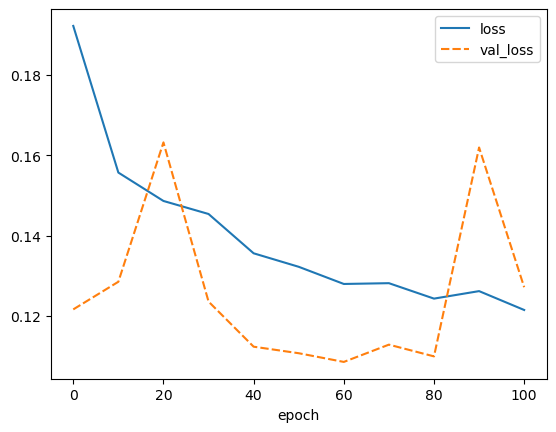

best weights loaded


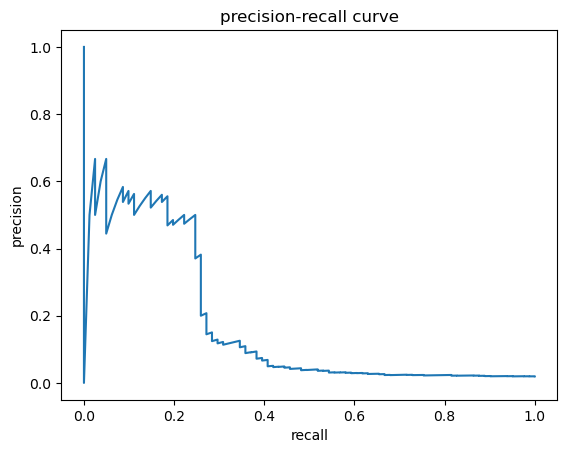

elapsed time: 475.7078785896301
run: 57
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x00000167E3379B80>, <function global_max_pool at 0x00000167E337D550>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000167F1442DF0>, <dgl.data.utils.Subset object at 0x00000168922CF130>, <dgl.data.utils.Subset object at 0x00000168922CF850>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=1024, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  794113
Epoch 0 | Train Loss 0.1950160883592837 | Validation Loss 0.16085609048604965 | Validation accuracy 0.9630399816176471
Epoch 10 | Train Loss 0.15147365923180725 | Validation Loss 0.12592510581016542 | Validation accuracy 0.974609375
Epoch 20 | T

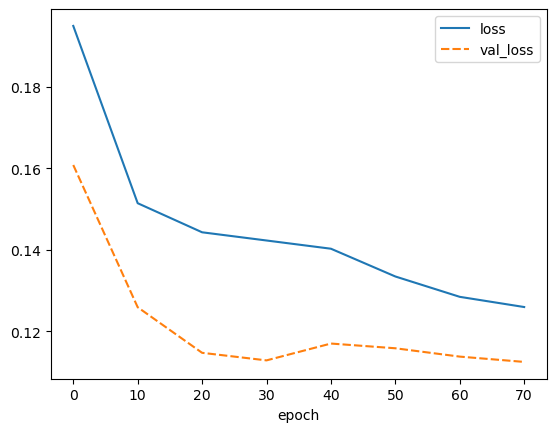

best weights loaded


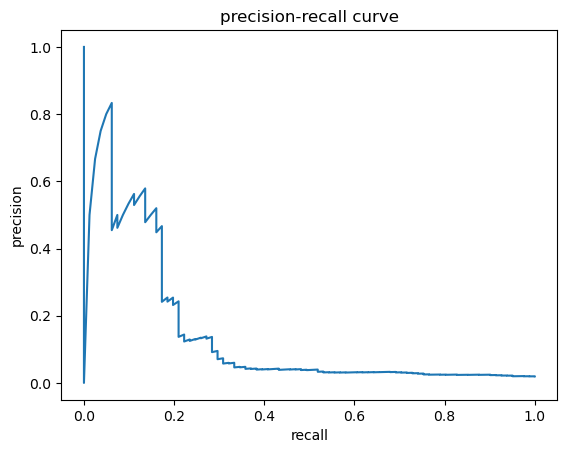

elapsed time: 424.4636297225952
run: 58
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x00000167E3379B80>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000167E60B4A00>, <dgl.data.utils.Subset object at 0x00000168923D6BE0>, <dgl.data.utils.Subset object at 0x00000168923DF2B0>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  793601
Epoch 0 | Train Loss 0.19013257279540552 | Validation Loss 0.11874432452023029 | Validation accuracy 0.974609375
Epoch 10 | Train Loss 0.1561960049650886 | Validation Loss 0.17394736111164094 | Validation accuracy 0.9514705882352942
Epoch 20 | Train Loss 0.15671181385264252 | Validation Loss 0.1

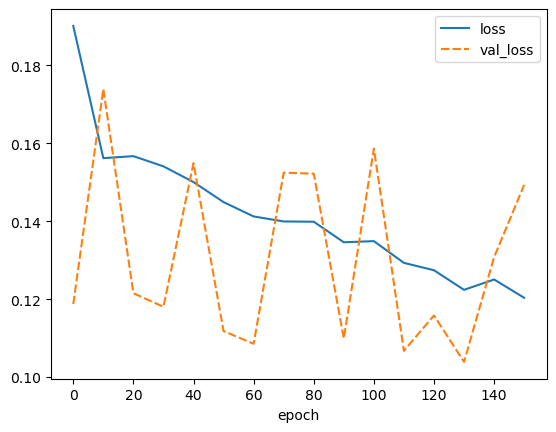

best weights loaded


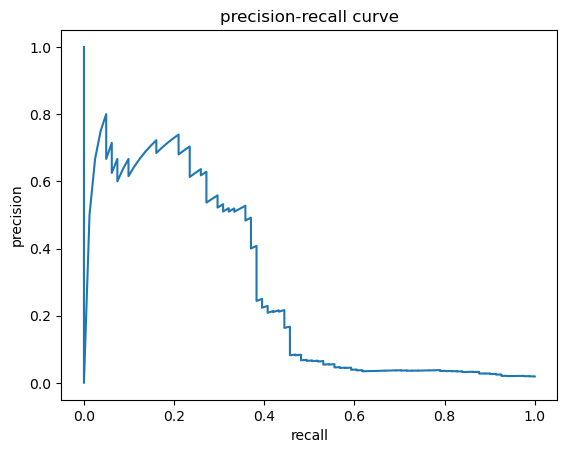

elapsed time: 778.1691787242889
run: 59
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x00000167E337D550>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000167EDCB4070>, <dgl.data.utils.Subset object at 0x00000168923D6A00>, <dgl.data.utils.Subset object at 0x00000168923D6820>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  793601
Epoch 0 | Train Loss 0.19567551508997427 | Validation Loss 0.16613735258579254 | Validation accuracy 0.9630399816176471
Epoch 10 | Train Loss 0.15462052122210013 | Validation Loss 0.1572791576385498 | Validation accuracy 0.9630399816176471
Epoch 20 | Train Loss 0.1496901155421228 | Validation Los

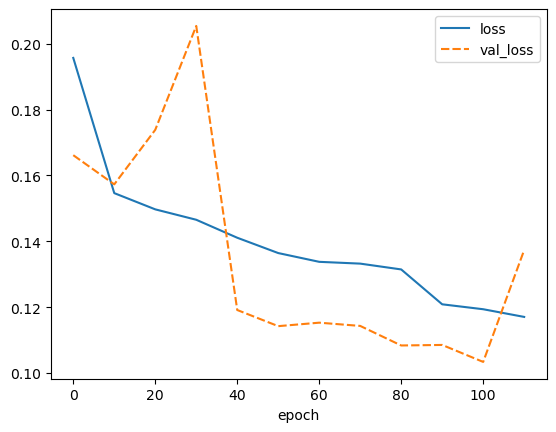

best weights loaded


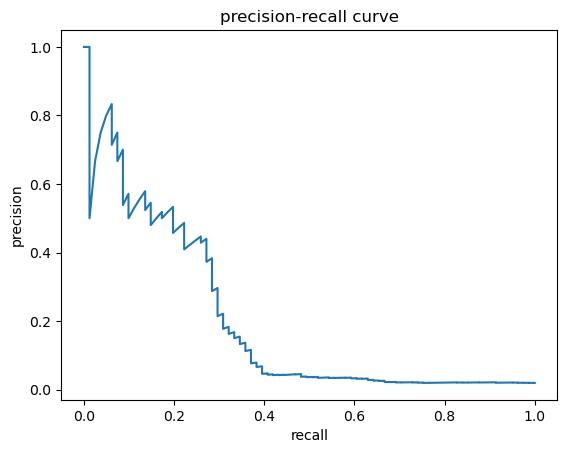

elapsed time: 596.5799264907837
run: 60
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 1, 'aggregations_list': [<function global_mean_pool at 0x00000167E3379B80>, <function global_max_pool at 0x00000167E337D550>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000167E9BE2C70>, <dgl.data.utils.Subset object at 0x00000167EDCB4B20>, <dgl.data.utils.Subset object at 0x00000167EDCB4A60>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=1024, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  6145
Epoch 0 | Train Loss 0.22018179748997543 | Validation Loss 0.12314279526472091 | Validation accuracy 0.974609375
Epoch 10 | Train Loss 0.15564055785988318 | Validation Loss 0.16180549263954164 | Validation accuracy 0.9630399816176471
Epoch 20 | Train Loss 0.15126721741575183 |

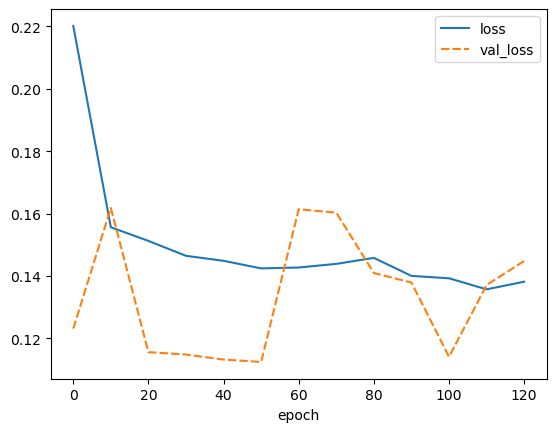

best weights loaded


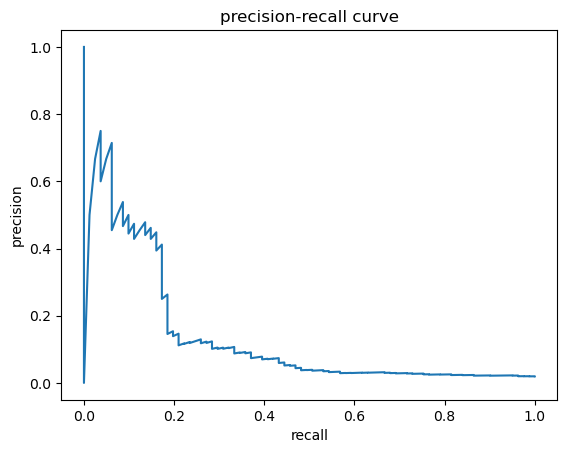

elapsed time: 405.63938188552856
run: 61
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 1, 'aggregations_list': [<function global_mean_pool at 0x00000167E3379B80>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000167DFC3BD60>, <dgl.data.utils.Subset object at 0x000001687F4E1280>, <dgl.data.utils.Subset object at 0x000001687F4E14F0>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  5633
Epoch 0 | Train Loss 0.220899964372317 | Validation Loss 0.11943411007523537 | Validation accuracy 0.974609375
Epoch 10 | Train Loss 0.1595388718626716 | Validation Loss 0.16017142981290816 | Validation accuracy 0.9630399816176471
Epoch 20 | Train Loss 0.16047257636532639 | Validation Loss 0.11757782697677613 | Validation acc

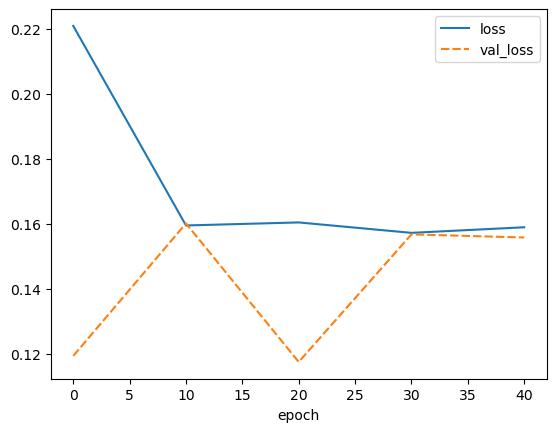

best weights loaded


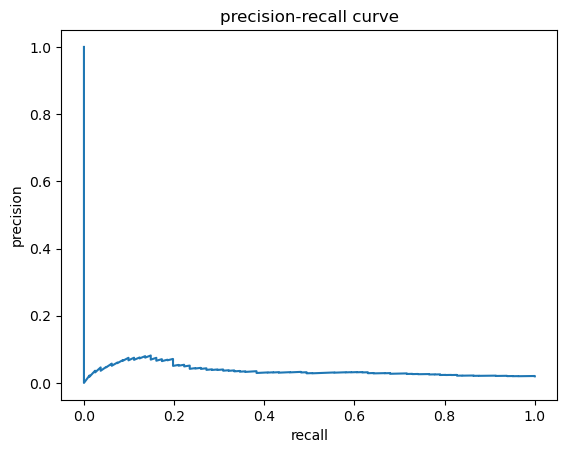

elapsed time: 140.03870344161987
run: 62
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 1, 'aggregations_list': [<function global_max_pool at 0x00000167E337D550>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000167EBAC7A30>, <dgl.data.utils.Subset object at 0x00000167F1063250>, <dgl.data.utils.Subset object at 0x00000167EDCB4040>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  5633
Epoch 0 | Train Loss 0.21056788753379474 | Validation Loss 0.26380023658275603 | Validation accuracy 0.9399011948529411
Epoch 10 | Train Loss 0.15585873117952637 | Validation Loss 0.12147708833217621 | Validation accuracy 0.974609375
Epoch 20 | Train Loss 0.15351182899691843 | Validation Loss 0.155721914768219 | Validation acc

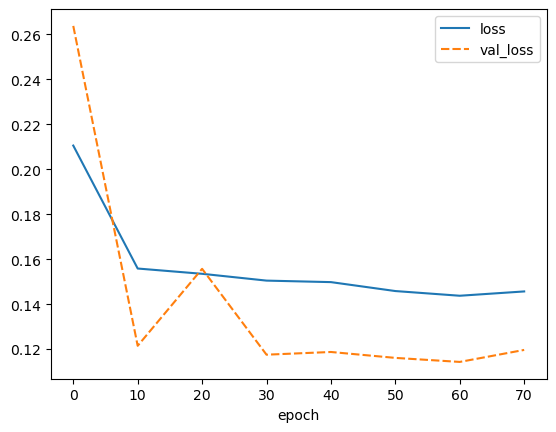

best weights loaded


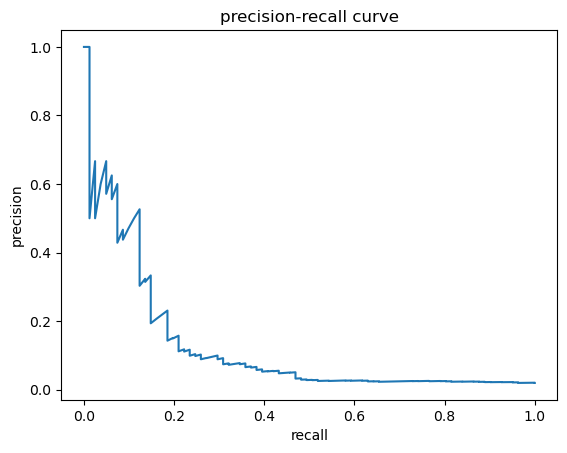

elapsed time: 232.1516318321228
run: 63
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 2, 'aggregations_list': [<function global_mean_pool at 0x00000167E3379B80>, <function global_max_pool at 0x00000167E337D550>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000167EF8724C0>, <dgl.data.utils.Subset object at 0x00000167C19AE070>, <dgl.data.utils.Subset object at 0x00000167C19AE970>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1): GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=1024, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  268801
Epoch 0 | Train Loss 0.21376761703780203 | Validation Loss 0.1305892698466778 | Validation accuracy 0.974609375
Epoch 10 | Train Loss 0.15264654791716373 | Validation Loss 0.1531127005815506 | Validation accuracy 0.9630399816176471
Epoch 20 | Train

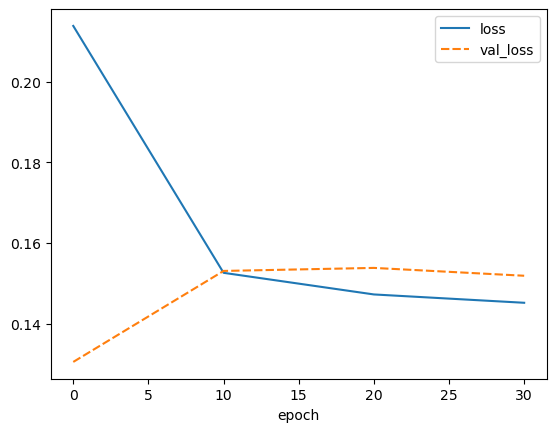

best weights loaded


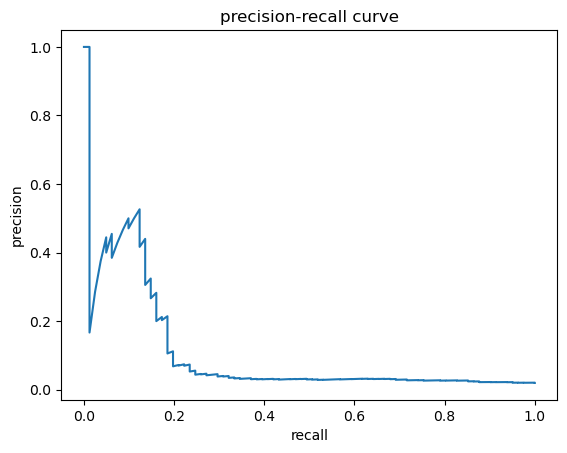

elapsed time: 150.26080131530762
run: 64
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 2, 'aggregations_list': [<function global_mean_pool at 0x00000167E3379B80>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000167F0C1EE80>, <dgl.data.utils.Subset object at 0x000001688E2DCAF0>, <dgl.data.utils.Subset object at 0x000001688E2DCD60>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1): GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  268289
Epoch 0 | Train Loss 0.19569477303461594 | Validation Loss 0.12452633082866668 | Validation accuracy 0.974609375
Epoch 10 | Train Loss 0.1560426444718332 | Validation Loss 0.11625026650726795 | Validation accuracy 0.974609375
Epoch 20 | Train Loss 0.15536196823372986 | Validation Loss 0.1172389432

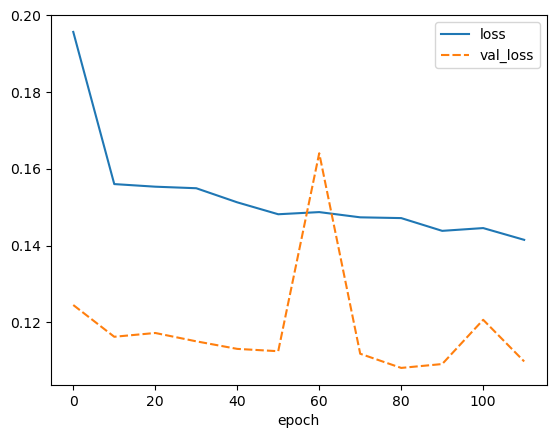

best weights loaded


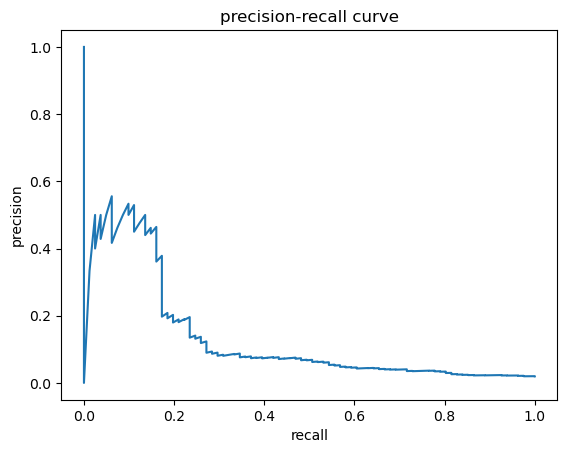

elapsed time: 419.214337348938
run: 65
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 2, 'aggregations_list': [<function global_max_pool at 0x00000167E337D550>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000167E60AF3A0>, <dgl.data.utils.Subset object at 0x000001688E2C96D0>, <dgl.data.utils.Subset object at 0x000001688E2CA580>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1): GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  268289
Epoch 0 | Train Loss 0.21749349841565796 | Validation Loss 0.13665357008576393 | Validation accuracy 0.974609375
Epoch 10 | Train Loss 0.15291446921500293 | Validation Loss 0.2426105782389641 | Validation accuracy 0.9399011948529411
Epoch 20 | Train Loss 0.1510841049479716 | Validation Loss 0.1153092

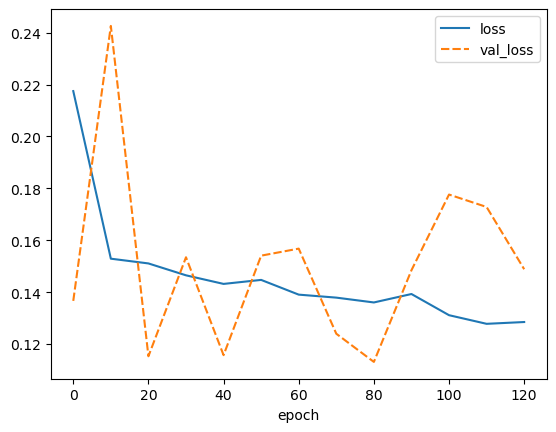

best weights loaded


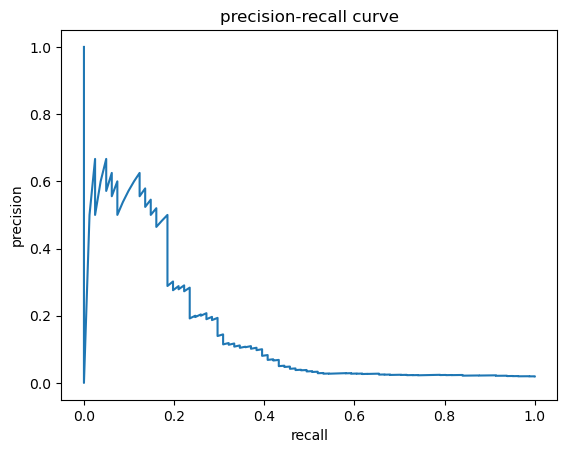

elapsed time: 472.70132303237915
run: 66
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 3, 'aggregations_list': [<function global_mean_pool at 0x00000167E3379B80>, <function global_max_pool at 0x00000167E337D550>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000167F4486310>, <dgl.data.utils.Subset object at 0x00000167899D62E0>, <dgl.data.utils.Subset object at 0x00000167899D6550>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-2): 2 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=1024, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  531457
Epoch 0 | Train Loss 0.1942114613272927 | Validation Loss 0.1612279385328293 | Validation accuracy 0.9630399816176471
Epoch 10 | Train Loss 0.15500982105731964 | Validation Loss 0.15723921060562135 | Validation accuracy 0.9630399816176471
Ep

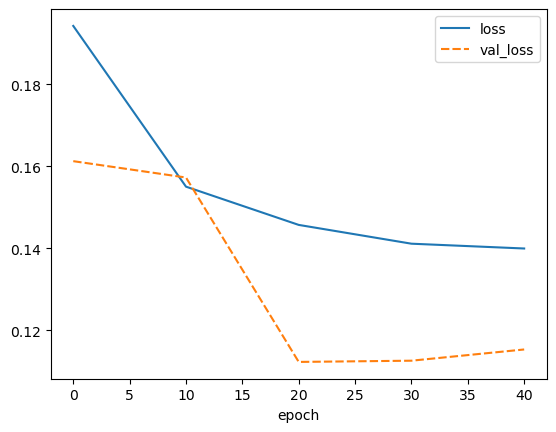

best weights loaded


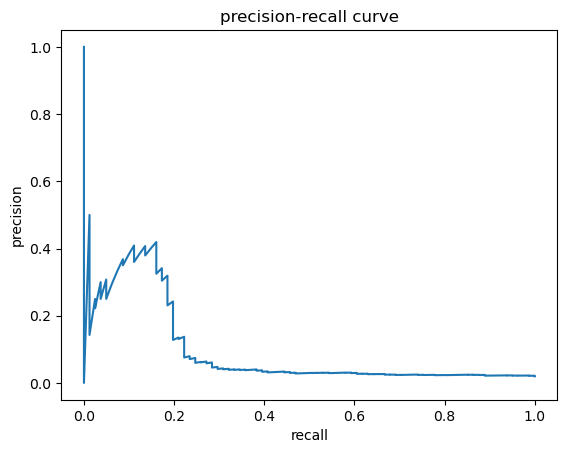

elapsed time: 228.20790767669678
run: 67
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 3, 'aggregations_list': [<function global_mean_pool at 0x00000167E3379B80>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000167E60EA7C0>, <dgl.data.utils.Subset object at 0x00000167899D6D00>, <dgl.data.utils.Subset object at 0x0000016789921280>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-2): 2 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  530945
Epoch 0 | Train Loss 0.1964866550582828 | Validation Loss 0.15940997302532195 | Validation accuracy 0.9630399816176471
Epoch 10 | Train Loss 0.15713596750389447 | Validation Loss 0.11899180710315704 | Validation accuracy 0.974609375
Epoch 20 | Train Loss 0.15342063389041208 | Validation Loss

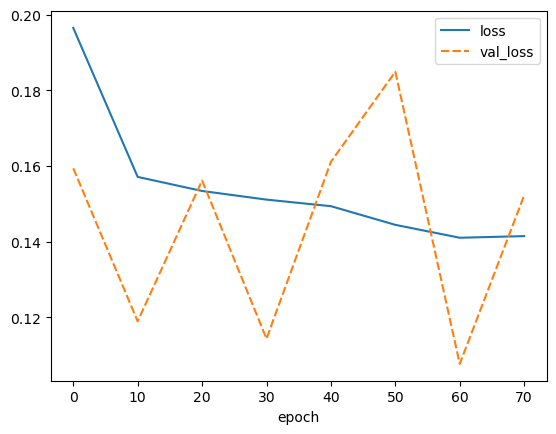

best weights loaded


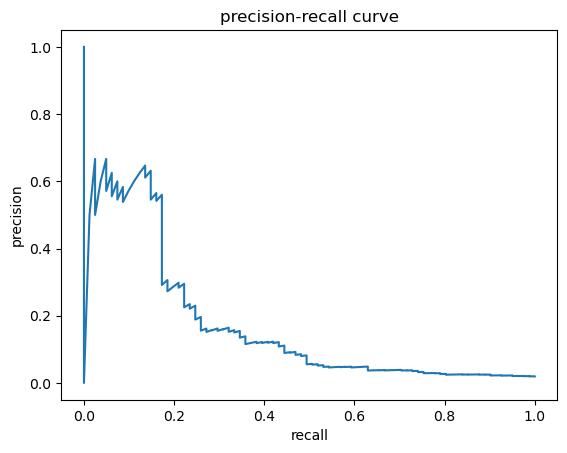

elapsed time: 330.93311882019043
run: 68
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 3, 'aggregations_list': [<function global_max_pool at 0x00000167E337D550>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000167E60B4BB0>, <dgl.data.utils.Subset object at 0x00000167899213D0>, <dgl.data.utils.Subset object at 0x0000016789921A30>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-2): 2 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  530945
Epoch 0 | Train Loss 0.194780230183493 | Validation Loss 0.2027389019727707 | Validation accuracy 0.9514705882352942
Epoch 10 | Train Loss 0.15295321562073447 | Validation Loss 0.1509973004460335 | Validation accuracy 0.9630399816176471
Epoch 20 | Train Loss 0.1484484805753737 | Validation Lo

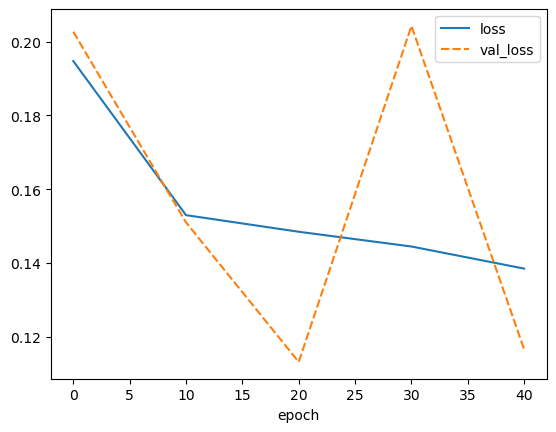

best weights loaded


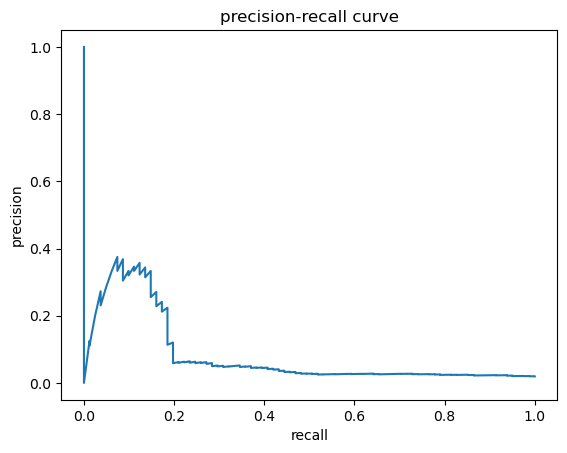

elapsed time: 190.81661319732666
run: 69
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x00000167E3379B80>, <function global_max_pool at 0x00000167E337D550>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000167F26C2E50>, <dgl.data.utils.Subset object at 0x000001687DDDD9D0>, <dgl.data.utils.Subset object at 0x000001687DDDD730>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=1024, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  794113
Epoch 0 | Train Loss 0.20644775755477673 | Validation Loss 0.13209239020943642 | Validation accuracy 0.974609375
Epoch 10 | Train Loss 0.151588856270819 | Validation Loss 0.1144923061132431 | Validation accuracy 0.974609375
Epoch 20 | Train 

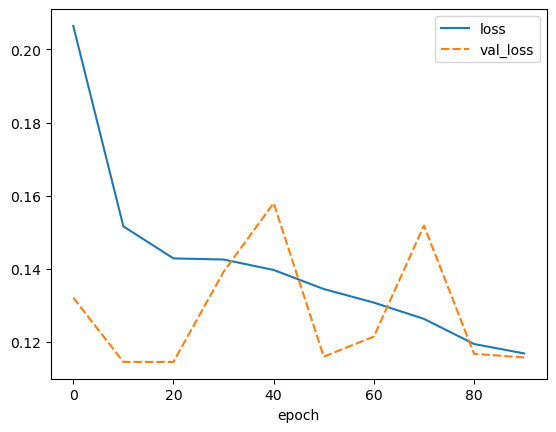

best weights loaded


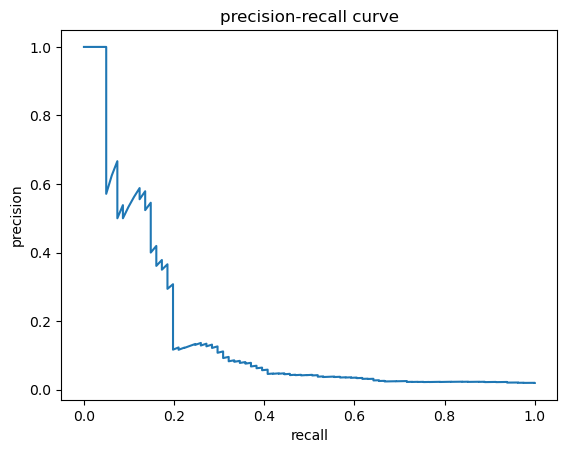

elapsed time: 541.2425992488861
run: 70
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x00000167E3379B80>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000167F4B8B220>, <dgl.data.utils.Subset object at 0x000001688E12E700>, <dgl.data.utils.Subset object at 0x0000016892307340>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  793601
Epoch 0 | Train Loss 0.19645057844393182 | Validation Loss 0.12163461297750473 | Validation accuracy 0.974609375
Epoch 10 | Train Loss 0.15707586818572247 | Validation Loss 0.11785357594490051 | Validation accuracy 0.974609375
Epoch 20 | Train Loss 0.15565849298780615 | Validation Loss 0.1194

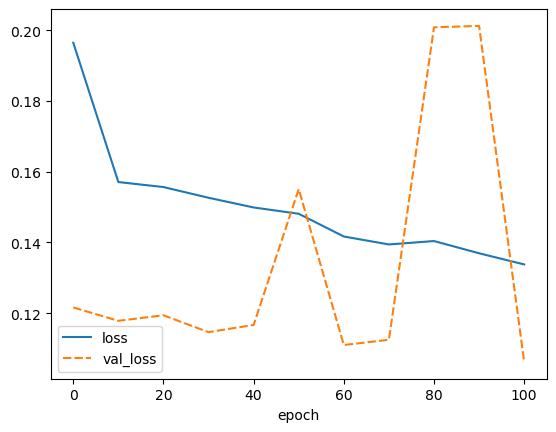

best weights loaded


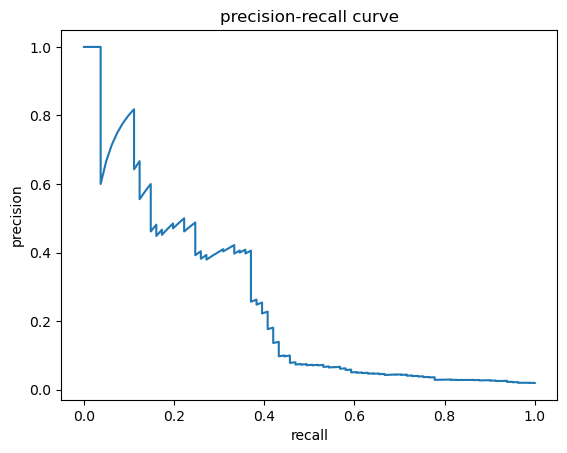

elapsed time: 562.5256190299988
run: 71
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x00000167E337D550>], 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000167E8673FA0>, <dgl.data.utils.Subset object at 0x000001689230E0A0>, <dgl.data.utils.Subset object at 0x000001689230EB50>]
GCN_molecule_classification(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Number of parameters:  793601
Epoch 0 | Train Loss 0.20158137516541916 | Validation Loss 0.12383206263184547 | Validation accuracy 0.974609375
Epoch 10 | Train Loss 0.15320926543438074 | Validation Loss 0.19402406960725785 | Validation accuracy 0.9514705882352942
Epoch 20 | Train Loss 0.14979226796916037 | Validation Loss 

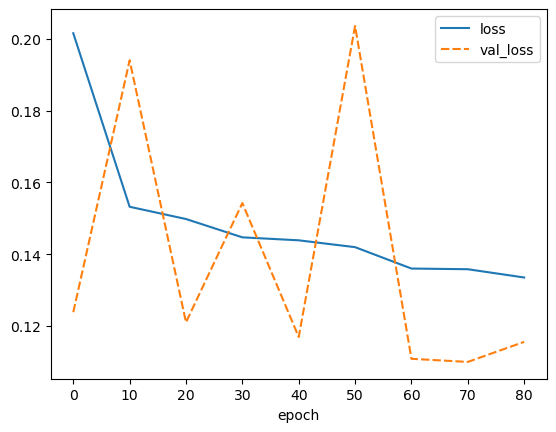

best weights loaded


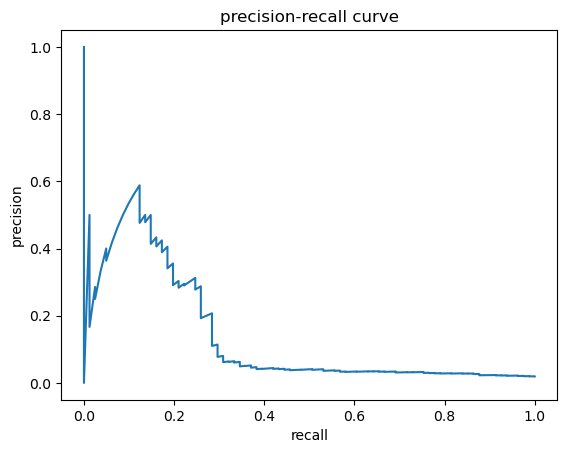

elapsed time: 488.95811104774475


In [12]:
import time
counter = 0
for combination in combinations:
    print(f"run: {counter}")
    t0 = time.time()
    counter = counter + 1
    
    #print(combination)
    combination_dict = dict(zip(keys, combination))
    print(combination_dict)
    

    apply_scaffold_split = combination_dict["apply_scaffold_split_list"]

    if not use_fingerprints:
        hidden_channels=combination_dict["hidden_channels_list"]
        gcn_layers=combination_dict["gcn_layers_list"]
        linear_sizes=combination_dict["linear_sizes_list"]
        aggregations=deepcopy(combination_dict["aggregations_list"])
    else:
        radius = combination_dict["radius"] 
        fpSize = combination_dict["fpSize"]
        linear_layers = combination_dict["linear_layers"] 
        create_count_fp = combination_dict["create_count_fp"] 



    if create_new_data:
        data, data_y = load_hiv()

        pytorch_graph_list = create_pytorch_graph(data)

        processed_data = process_pytorch_graph(pytorch_graph_list, data_y)

        train_dataset, test_dataset, val_dataset = create_train_test_graphs(processed_data, train_percentage= 0.8, test_percentage = 0.1, apply_scaffold_split = apply_scaffold_split )
        loader, test_loader, val_loader = create_dataloader_val(train_dataset, test_dataset, val_dataset, batch_size=batch_size)

    else:

        import dill as pickle

        if apply_scaffold_split:
            loader_file = 'datasets_scaffold_class_hiv.pkl'
        else: 
            loader_file = 'datasets_class_hiv.pkl'
        with open(loader_file, 'rb') as file: 
            
            
            loaders = pickle.load(file) 
        
            print(loaders) 

        train_dataset, test_dataset, val_dataset = loaders


        if use_fingerprints:
            morgan_data_train, morgan_data_test, morgan_data_val = create_fingerprint_sets(datasets=[train_dataset, test_dataset, val_dataset], radius=radius, fpSize = fpSize, create_count_fp = create_count_fp)

            loader = DataLoader(morgan_data_train, 
                                batch_size=batch_size, shuffle=True)
            test_loader = DataLoader(morgan_data_test, 
                                    batch_size=batch_size, shuffle=True)
            val_loader = DataLoader(morgan_data_val, 
                                    batch_size=batch_size, shuffle=True)

        else:
            loader, test_loader, val_loader = create_dataloader_val(train_dataset, test_dataset, val_dataset, batch_size=batch_size)
        

    if not use_fingerprints:
        model, device, optimizer, loss_fn = initialize_classification_model(input_dim=train_dataset.dataset[0].x.shape[-1], hidden_channels=hidden_channels, gcn_layers=gcn_layers, linear_sizes=linear_sizes, aggregations=aggregations, apply_random_aggregations=apply_random_aggregations, learning_rate=learning_rate)


        model, best_model_weights, losses, val_losses = classification_train(model, loader, val_loader, device, loss_fn, optimizer, log_time=10, max_epochs=1000, apply_early_stopping = True, early_stopping_patience = 20, finally_plot_losses = True)
        plt.show()
        precisions, recalls, thresholds, dfs = predict_classification(model, test_loader, device, best_model_weights)

    else:

        model, device, optimizer, loss_fn = initialize_classification_model_fingerprint( linear_layers=linear_layers, learning_rate=learning_rate)


        model, best_model_weights, losses, val_losses = classification_train_fingerprint(model, loader, val_loader, device, loss_fn, optimizer, log_time=100, max_epochs=1000, apply_early_stopping = True, early_stopping_patience = 20, finally_plot_losses = True)
        plt.show()
        precisions, recalls, thresholds, dfs = predict_classification_fingerprint(model, test_loader, device, best_model_weights)

    plt.show()

    el_time = time.time() - t0
    print(f"elapsed time: {el_time}")

    final_df = pd.concat(dfs)
    
    save_dict = dict()

    save_dict["pred_df"] = final_df

    save_dict["el_time"] = el_time

    #classification
    save_dict["precisions"] = precisions
    save_dict["recalls"] = recalls
    save_dict["thresholds"] = thresholds
    from sklearn.metrics import precision_recall_curve, auc
    save_dict["auc"] = auc(recalls, precisions)

    save_dict["batch_size"] = batch_size

    aggregations_names = [x.__name__ for x in aggregations]

    save_dict["apply_scaffold_split"] = apply_scaffold_split

    if not use_fingerprints:
        save_dict["hidden_channels"] = hidden_channels
        save_dict["gcn_layers"] = gcn_layers
        save_dict["linear_sizes"] = linear_sizes
        save_dict["aggregations"] = aggregations_names
    else:
        save_dict["radius"] = radius
        save_dict["fpSize"] = fpSize
        save_dict["linear_layers"] = linear_layers
        save_dict["create_count_fp"] = create_count_fp
        
    save_dict["apply_random_aggregations"] = apply_random_aggregations
    save_dict["learning_rate"] = learning_rate

    save_dict["model_type"] = model_type
    save_dict["model"] = model

    from os.path import exists
    final_filename = filename_basic
    counter = 1
    while exists(final_filename):
        final_filename = filename_basic + "_" + str(counter)
        counter = counter + 1

    import pickle
    with open(final_filename, 'wb') as handle:
        pickle.dump(save_dict, handle)


    